In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

# 데이터 읽기

In [2]:
customer = pd.read_csv('./olist_customers_dataset.csv')
geo = pd.read_csv('./olist_geolocation_dataset.csv')
order_item = pd.read_csv('./olist_order_items_dataset.csv')
order_payments = pd.read_csv('./olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('./olist_order_reviews_dataset.csv')
orders = pd.read_csv('./olist_orders_dataset.csv')
products = pd.read_csv('./olist_products_dataset.csv')
seller = pd.read_csv('./olist_sellers_dataset.csv')
name_trans = pd.read_csv('./product_category_name_translation.csv')

# customer
~~~
- customer_id
- customer_unique_id
- customer_zip_code_prefix
- customer_city
- customer_state

- customer의 거주지 정보

In [3]:
customer.head(1)

customer_id                customer_unique_id   
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0  \

   customer_zip_code_prefix customer_city customer_state  
0                     14409        franca             SP

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


# geo
~~~
- geolocation_zip_code_prefix
- geolocation_lat
- geolocation_lng
- geolocation_city
- geolocation_state

- zip_code별 위치 표시 가능

In [5]:
geo.head(1)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng   
0                         1037       -23.545621       -46.639292  \

  geolocation_city geolocation_state  
0        sao paulo                SP

In [6]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


# order_item
~~~
- order_id
- order_item_id
- product_id
- seller_id
- shipping_limit_date
- price
- freight_value

- 주문별/상품별/판매자별 가격
- 주문별/상품별/판매자별 shipping limit date
- 주문별/상품별/판매자별 freight_value

In [7]:
order_item.head(1)

order_id  order_item_id   
0  00010242fe8c5a6d1ba2dd792cb16214              1  \

                         product_id                         seller_id   
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202  \

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29

In [8]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


# order_payments
~~~
- order_id
- payment_sequential
- payment_type
- payment_installments
- payment_value

- 주문별 결제 타입
- 주문별/결제타입별 payment_value
- 주문별/결제타입별 할부 개월 수

In [9]:
order_payments.head(1)

order_id  payment_sequential payment_type   
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card  \

   payment_installments  payment_value  
0                     8          99.33

In [10]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


# order_reviews
~~~
- review_id
- order_id
- review_score
- review_comment_title
- review_comment_message
- review_creation_date
- review_answer_timestamp

- 주문별 리뷰, 리뷰 점수

In [11]:
order_reviews.head(1)

review_id                          order_id   
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb  \

   review_score review_comment_title review_comment_message   
0             4                  NaN                    NaN  \

  review_creation_date review_answer_timestamp  
0  2018-01-18 00:00:00     2018-01-18 21:46:59

In [12]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


# orders
~~~
- order_id
- customer_id
- order_status
- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date

- 주문별 배송현황

In [13]:
orders.head(1)

order_id                       customer_id   
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d  \

  order_status order_purchase_timestamp    order_approved_at   
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15  \

  order_delivered_carrier_date order_delivered_customer_date   
0          2017-10-04 19:55:00           2017-10-10 21:25:13  \

  order_estimated_delivery_date  
0           2017-10-18 00:00:00

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


# products
~~~
- product_id
- product_category_name
- product_name_lenght
- product_description_lenght
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

- 상품별 카테고리

In [15]:
products.head(1)

product_id product_category_name   
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria  \

   product_name_lenght  product_description_lenght  product_photos_qty   
0                 40.0                       287.0                 1.0  \

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0

In [16]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


# seller
~~~
- seller_id
- seller_zip_code_prefix
- seller_city
- seller_state

- 판매자별 위치

In [17]:
seller.head(1)

seller_id  seller_zip_code_prefix seller_city   
0  3442f8959a84dea7ee197c632cb2df15                   13023    campinas  \

  seller_state  
0           SP

In [18]:
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


# name_trans
~~~
- product_category_name
- product_category_name_english

- 상품 이름 변경

In [19]:
name_trans.head(1)

product_category_name product_category_name_english
0          beleza_saude                 health_beauty

# 데이터 스키마

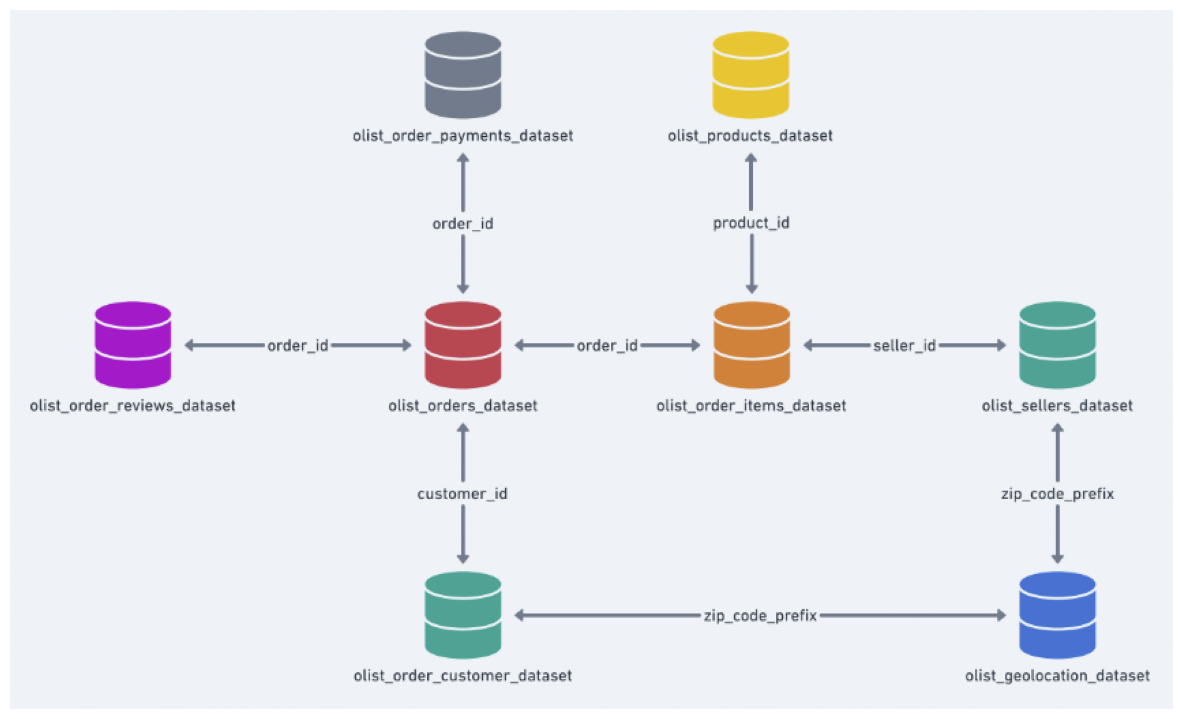

In [20]:
image_path = './Screenshot 2023-08-15 at 10.00.42 PM.png'
image = mpimg.imread(image_path)

plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.axis('off')
plt.show()

# EDA

#### 상품 카테고리 이름 변경 (products)

- products(product_category_name) -> name_trans(product_category_name_english)

#### 위치 분석

- 사용자 위치 분석
    - customer(customer_zip_code_prefix) -> geo
- 판매자 위치 분석
    - seller(seller_zip_code_prefix) -> geo
- 사용자 위치별 배송 현황 분석
    - orders -> customer -> geo
- 지역별 상품 카테고리 판매량 분석
    - orders -> products -> customer -> geo

#### 상품별 분석 (order_item)


- 상품 가격 분포도
- 상품 카테고리 분포
- 가격별 결제 타입 분석
    - order_item(order_id) -> order_payments
- 카테고리별 결제 타입 분석
    - order_item -> products -> order_payments
- 상품 카테고리별 리뷰 평점 분석
    - order_item -> products -> order_reviews
- 상품별 가치 평가 분석
    - products -> order_item
- 상품 정보의 양에 대한 판매량 분석
    - products -> orders
- 상품 정보의 양에 대한 리뷰 긍정도 분석
    - products -> order_reviews
- 상품별/상품 가격에 대한 할부 개월수 분석
    - order_item -> products -> order_payments

#### 사용자별 분석

- 사용자 결제 방법 분포도
    - order_payments -> orders -> customer
- 휴면 고객 분포도
    - orders (기간 정해서 구매 내역 없는 고객)
- 휴면 고객이었다가 다시 구매내역이 있는 고객이 구매한 물품
    - 휴면 고객 분포 -> order_item -> products

#### 판매자별 분석

- 평점이 좋은 판매자의 물품 가격
    - order_reviews -> order_item -> seller

# 지역별 상품 카테고리 판매량 분석

In [21]:
merged_df = pd.merge(order_item, orders, on='order_id', how='left')
merged_df = pd.merge(merged_df, customer, on='customer_id', how='left')
merged_df = pd.merge(merged_df, products, on='product_id', how='left')
merged_with_geo = pd.merge(merged_df, geo, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

In [22]:
merged_with_geo = merged_with_geo[['order_id', 'product_id', 'price', 'freight_value', 'customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'product_category_name', 'geolocation_lat', 'geolocation_lng']]
merged_with_geo.head(1)

order_id                        product_id  price   
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   58.9  \

   freight_value                       customer_id  customer_zip_code_prefix   
0          13.29  3ce436f183e68e07877b285a838db11a                     28013  \

           customer_city customer_state product_category_name   
0  campos dos goytacazes             RJ            cool_stuff  \

   geolocation_lat  geolocation_lng  
0       -21.758076       -41.312633

In [23]:
selected_columns = ['order_id', 'product_id', 'price', 'freight_value', 'customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'product_category_name']
deduplicated_df = merged_with_geo.drop_duplicates(subset=selected_columns)
deduplicated_df = pd.merge(deduplicated_df, name_trans, left_on='product_category_name', right_on='product_category_name', how='left')
deduplicated_df.head(1)

order_id                        product_id  price   
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   58.9  \

   freight_value                       customer_id  customer_zip_code_prefix   
0          13.29  3ce436f183e68e07877b285a838db11a                     28013  \

           customer_city customer_state product_category_name   
0  campos dos goytacazes             RJ            cool_stuff  \

   geolocation_lat  geolocation_lng product_category_name_english  
0       -21.758076       -41.312633                    cool_stuff

In [24]:
deduplicated_df = deduplicated_df[['order_id', 'product_id', 'price', 'freight_value', 'customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng','product_category_name_english']]
deduplicated_df['product_category_name_english'] = deduplicated_df['product_category_name_english'].str.replace('_', ' ')
deduplicated_df.head(1)

order_id                        product_id  price   
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   58.9  \

   freight_value                       customer_id  customer_zip_code_prefix   
0          13.29  3ce436f183e68e07877b285a838db11a                     28013  \

           customer_city customer_state  geolocation_lat  geolocation_lng   
0  campos dos goytacazes             RJ       -21.758076       -41.312633  \

  product_category_name_english  
0                    cool stuff

## 지역별 구매수

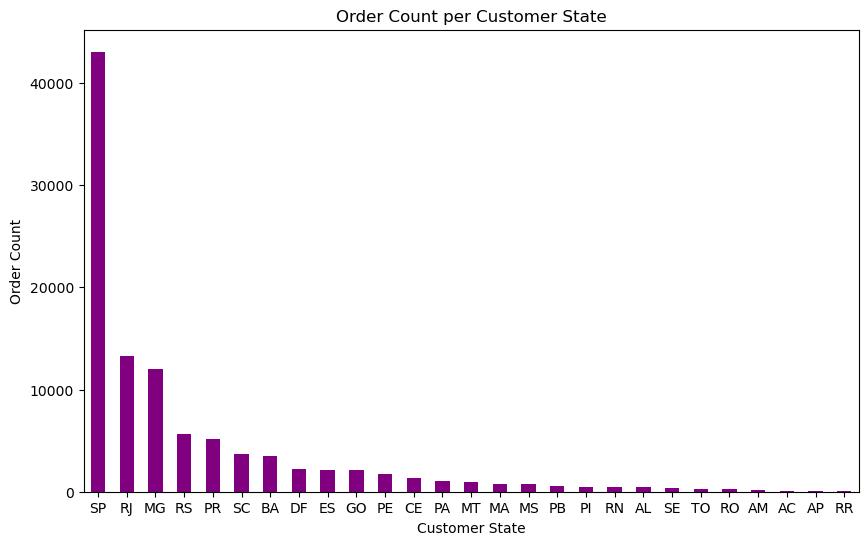

In [25]:
state_order_counts = deduplicated_df.groupby('customer_state')['order_id'].count()

state_order_counts_sorted = state_order_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
state_order_counts_sorted.plot(kind='bar', color='purple')
plt.xlabel('Customer State')
plt.ylabel('Order Count')
plt.title('Order Count per Customer State')
plt.xticks(rotation=0)
plt.show()

## 지역별 평균 구매 금액

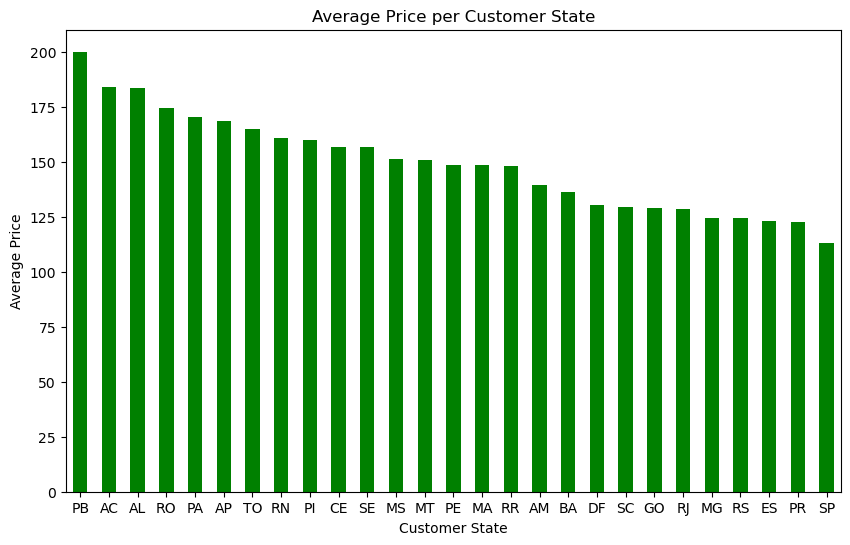

In [26]:
state_price_stats = deduplicated_df.groupby('customer_state')['price'].agg(['sum', 'count'])

state_price_stats['average_price'] = state_price_stats['sum'] / state_price_stats['count']

state_price_stats_sorted = state_price_stats.sort_values(by='average_price', ascending=False)

plt.figure(figsize=(10, 6))
state_price_stats_sorted['average_price'].plot(kind='bar', color='green')
plt.xlabel('Customer State')
plt.ylabel('Average Price')
plt.title('Average Price per Customer State')
plt.xticks(rotation=0)
plt.show()

In [27]:
state_price_stats_sorted.rename(columns={'sum': 'total_amount', 'count': 'purchase_count', 'average_price': 'average_amount'}, inplace=True)
print(state_price_stats_sorted)

                total_amount  purchase_count  average_amount
customer_state                                              
PB                 109474.48             547      200.136161
AC                  15080.86              82      183.912927
AL                  77080.86             420      183.525857
RO                  45017.97             258      174.488256
PA                 170998.96            1003      170.487498
AP                  11971.27              71      168.609437
TO                  47839.80             290      164.964828
RN                  80361.39             499      161.044870
PI                  80727.09             504      160.172798
CE                 214560.51            1367      156.957213
SE                  55211.70             352      156.851420
MS                 110710.02             732      151.243197
MT                 143141.09             950      150.674832
PE                 251129.06            1688      148.773140
MA                 11422

## 위치별 많이 팔린 상품

In [28]:
category_counts = deduplicated_df['product_category_name_english'].value_counts().reset_index()
category_counts.columns = ['product_category_name_english', 'count']
category_counts_sorted = category_counts.sort_values(by='count', ascending=False)

print(category_counts_sorted)

   product_category_name_english  count
0                 bed bath table  10160
1                  health beauty   9022
2                 sports leisure   7858
3          computers accessories   6887
4                furniture decor   6781
..                           ...    ...
66         arts and craftmanship     24
67                    la cuisine     13
68             cds dvds musicals     12
69     fashion childrens clothes      8
70         security and services      2

[71 rows x 2 columns]


In [29]:
# state_category_counts = deduplicated_df.groupby(['customer_state', 'product_category_name_english']).size().reset_index(name='count')
# state_category_counts_sorted = state_category_counts.sort_values(by=['customer_state', 'count'], ascending=[True, False])

# unique_states = state_category_counts_sorted['customer_state'].unique()
# num_states = len(unique_states)

# fig, axs = plt.subplots(nrows=num_states, figsize=(10, 6*num_states))
# fig.suptitle('Product Category Counts by Customer State')

# for idx, state in enumerate(unique_states):
#     state_data = state_category_counts_sorted[state_category_counts_sorted['customer_state'] == state]
#     ax = axs[idx]
#     ax.bar(state_data['product_category_name_english'], state_data['count'])
#     ax.set_xlabel('Product Category')
#     ax.set_ylabel('Count')
#     ax.set_title(f'State: {state}')
#     ax.tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()

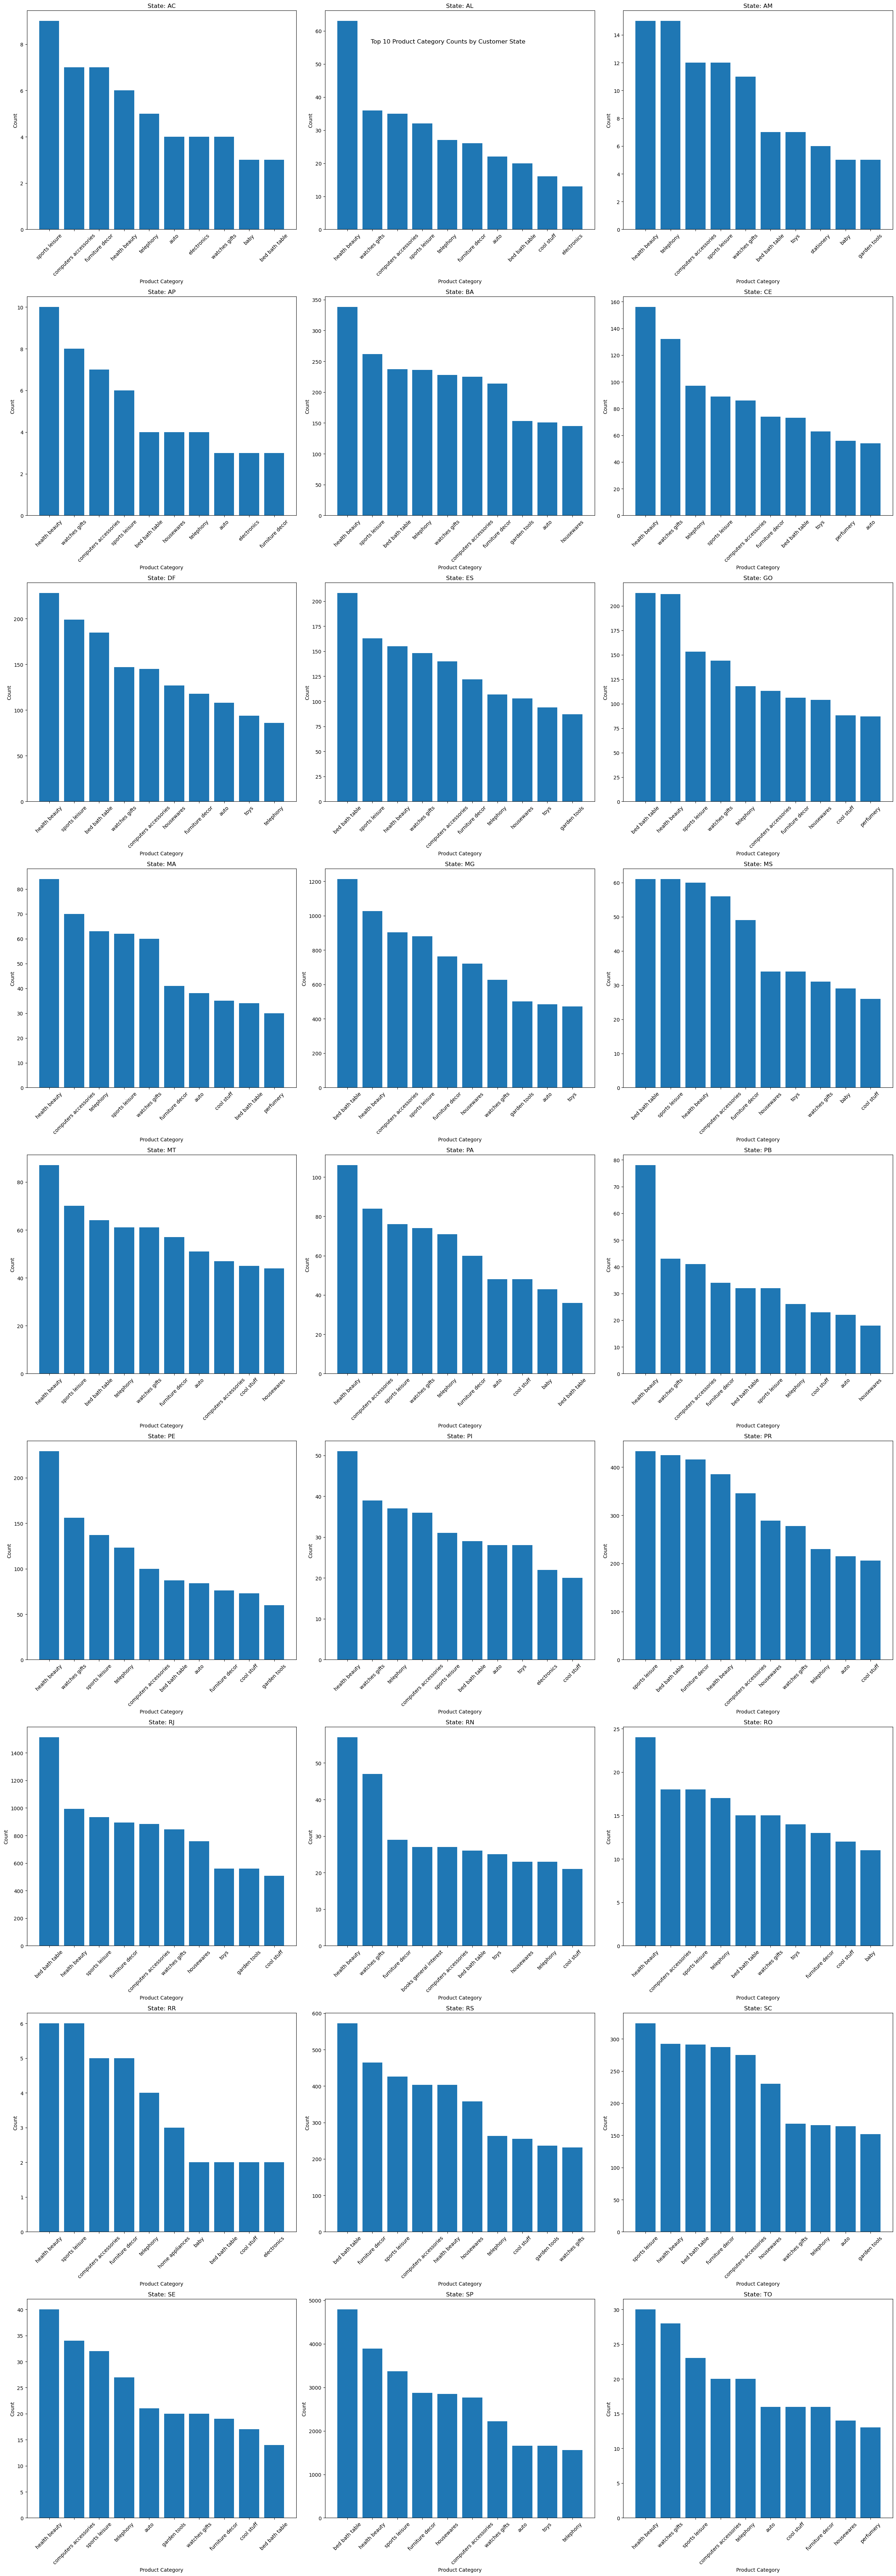

In [30]:
top10_categories = category_counts_sorted.head(10)

state_category_counts = deduplicated_df.groupby(['customer_state', 'product_category_name_english']).size().reset_index(name='count')
state_category_counts_sorted = state_category_counts.sort_values(by=['customer_state', 'count'], ascending=[True, False])

top10_categories_by_state = state_category_counts_sorted.groupby('customer_state').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

unique_states = top10_categories_by_state['customer_state'].unique()
num_states = len(unique_states)
num_cols = 3
num_rows = math.ceil(num_states / num_cols)

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 8 * num_rows))
fig.suptitle('Top 10 Product Category Counts by Customer State')

for idx, state in enumerate(unique_states):
    row = idx // num_cols
    col = idx % num_cols
    state_data = top10_categories_by_state[top10_categories_by_state['customer_state'] == state]
    ax = axs[row, col]
    ax.bar(state_data['product_category_name_english'], state_data['count'])
    ax.set_xlabel('Product Category')
    ax.set_ylabel('Count')
    ax.set_title(f'State: {state}')
    ax.tick_params(axis='x', rotation=45)

for idx in range(num_states, num_rows * num_cols):
    row = idx // num_cols
    col = idx % num_cols
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()

## 위치별 top5 판매 상품

In [31]:
state_category_counts = state_category_counts_sorted.groupby(['customer_state', 'product_category_name_english']).sum().reset_index()

top5_categories_by_state = state_category_counts.groupby('customer_state').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

unique_states = top5_categories_by_state['customer_state'].unique()

for state in unique_states:
    state_data = top5_categories_by_state[top5_categories_by_state['customer_state'] == state]
    print(f'State : {state}')
    
    for idx, row in state_data.iterrows():
        print(f"{row['product_category_name_english']} : {row['count']}")
    
    print()

State : AC
sports leisure : 9
computers accessories : 7
furniture decor : 7
health beauty : 6
telephony : 5

State : AL
health beauty : 63
watches gifts : 36
computers accessories : 35
sports leisure : 32
telephony : 27

State : AM
health beauty : 15
telephony : 15
computers accessories : 12
sports leisure : 12
watches gifts : 11

State : AP
health beauty : 10
watches gifts : 8
computers accessories : 7
sports leisure : 6
bed bath table : 4

State : BA
health beauty : 338
sports leisure : 262
bed bath table : 237
telephony : 236
watches gifts : 228

State : CE
health beauty : 156
watches gifts : 132
telephony : 97
sports leisure : 89
computers accessories : 86

State : DF
health beauty : 228
sports leisure : 199
bed bath table : 185
watches gifts : 147
computers accessories : 145

State : ES
bed bath table : 208
sports leisure : 163
health beauty : 155
watches gifts : 148
computers accessories : 140

State : GO
bed bath table : 213
health beauty : 212
sports leisure : 153
watches gifts

In [32]:
state_category_counts = state_category_counts_sorted.groupby(['customer_state', 'product_category_name_english']).sum().reset_index()

top1_categories_by_state = state_category_counts.groupby('customer_state').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)

unique_states = top1_categories_by_state['customer_state'].unique()

for state in unique_states:
    state_data = top1_categories_by_state[top1_categories_by_state['customer_state'] == state]
    print(f'State : {state}')
    
    for idx, row in state_data.iterrows():
        print(f"{row['product_category_name_english']} : {row['count']}")
    
    print()

State : AC
sports leisure : 9

State : AL
health beauty : 63

State : AM
health beauty : 15

State : AP
health beauty : 10

State : BA
health beauty : 338

State : CE
health beauty : 156

State : DF
health beauty : 228

State : ES
bed bath table : 208

State : GO
bed bath table : 213

State : MA
health beauty : 84

State : MG
bed bath table : 1212

State : MS
bed bath table : 61

State : MT
health beauty : 87

State : PA
health beauty : 106

State : PB
health beauty : 78

State : PE
health beauty : 229

State : PI
health beauty : 51

State : PR
sports leisure : 433

State : RJ
bed bath table : 1512

State : RN
health beauty : 57

State : RO
health beauty : 24

State : RR
health beauty : 6

State : RS
bed bath table : 572

State : SC
sports leisure : 324

State : SE
health beauty : 40

State : SP
bed bath table : 4788

State : TO
health beauty : 30



In [33]:
category_list = top1_categories_by_state['product_category_name_english'].tolist()
category_list = list(set(category_list))
print("Top 1 Categories by State:")
print(category_list)

Top 1 Categories by State:
['bed bath table', 'sports leisure', 'health beauty']


- Sports Lesiure (4) : AC, PR, RJ, SC
- Health beauty (17) : AL, AM, AP, BA, CE, DF, MA, MT, PA, PB, PE, PI, RN, RO, RR, SE, TO
- Bed bath table (6) : ES, GO, MG, MS, RS, SP

# 가격 형성

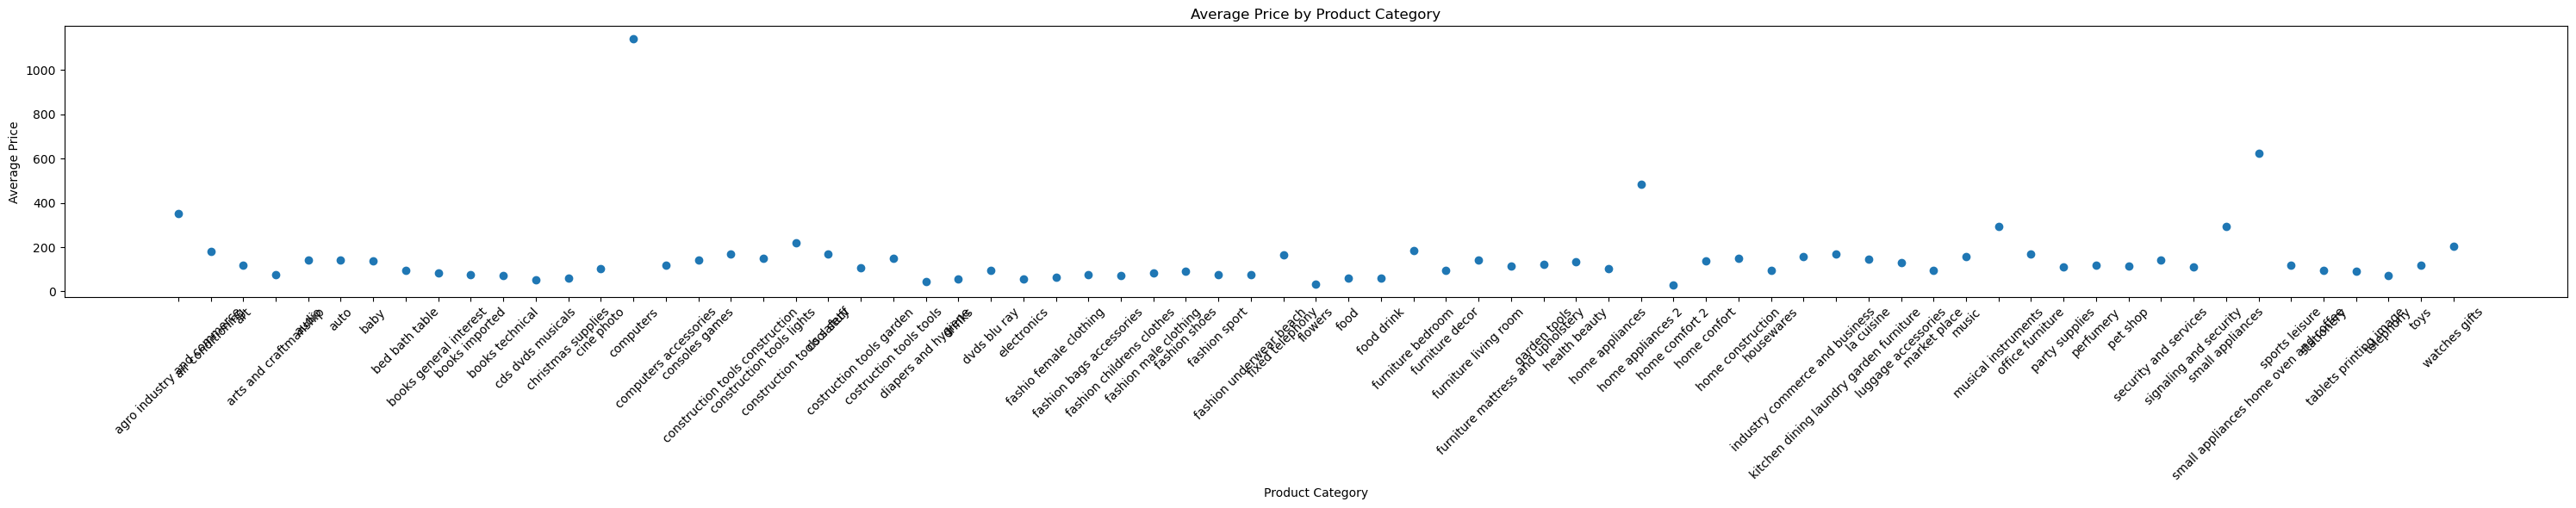

In [34]:
category_price_means = deduplicated_df.groupby('product_category_name_english')['price'].mean().reset_index()

plt.figure(figsize=(30, 6))
plt.scatter(category_price_means['product_category_name_english'], category_price_means['price'])
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.title('Average Price by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 가장 높은 평균가를 가진 제품
- 1순위 : computer
- 2순위 : small appliance
- 3순위 : home appliance

- 가장 판매가 많이 된 제품군 'bed bath table', 'sports leisure', 'health beauty'은 낮은 평균 가격대를 형성하고 있다.

## 각 위치별 상품이 총 가격에 차지하는 비율

In [35]:
state_category_total_prices = deduplicated_df.groupby(['customer_state', 'product_category_name_english'])['price'].sum().reset_index()

state_total_prices = state_category_total_prices.groupby('customer_state')['price'].sum().reset_index()

merged_df = pd.merge(state_category_total_prices, state_total_prices, on='customer_state', suffixes=('_category', '_total'))

merged_df['percentage'] = (merged_df['price_category'] / merged_df['price_total']) * 100

sorted_df = merged_df.sort_values(by=['customer_state', 'percentage'], ascending=[True, False])

top5_by_state = sorted_df.groupby('customer_state').head(5)

top5_by_state

customer_state product_category_name_english  price_category   
22               AC                sports leisure         1677.46  \
26               AC                 watches gifts         1389.60   
6                AC         computers accessories         1250.68   
15               AC                 health beauty         1201.68   
5                AC                     computers         1200.00   
...             ...                           ...             ...   
1355             TO                 watches gifts         5230.89   
1351             TO                sports leisure         4975.86   
1336             TO                 health beauty         4438.19   
1325             TO         computers accessories         4291.97   
1328             TO                    cool stuff         3429.41   

      price_total  percentage  
22       15013.96   11.172669  
26       15013.96    9.255386  
6        15013.96    8.330114  
15       15013.96    8.003751  
5        15013.96    7.992562  
...           ...         ...  
1355     47386.81   11.038705  
1351     47386.81   10.500517  
1336     47386.81    9.365876  
1325     47386.81    9.057309  
1328     47386.81    7.237056  

[135 rows x 5 columns]

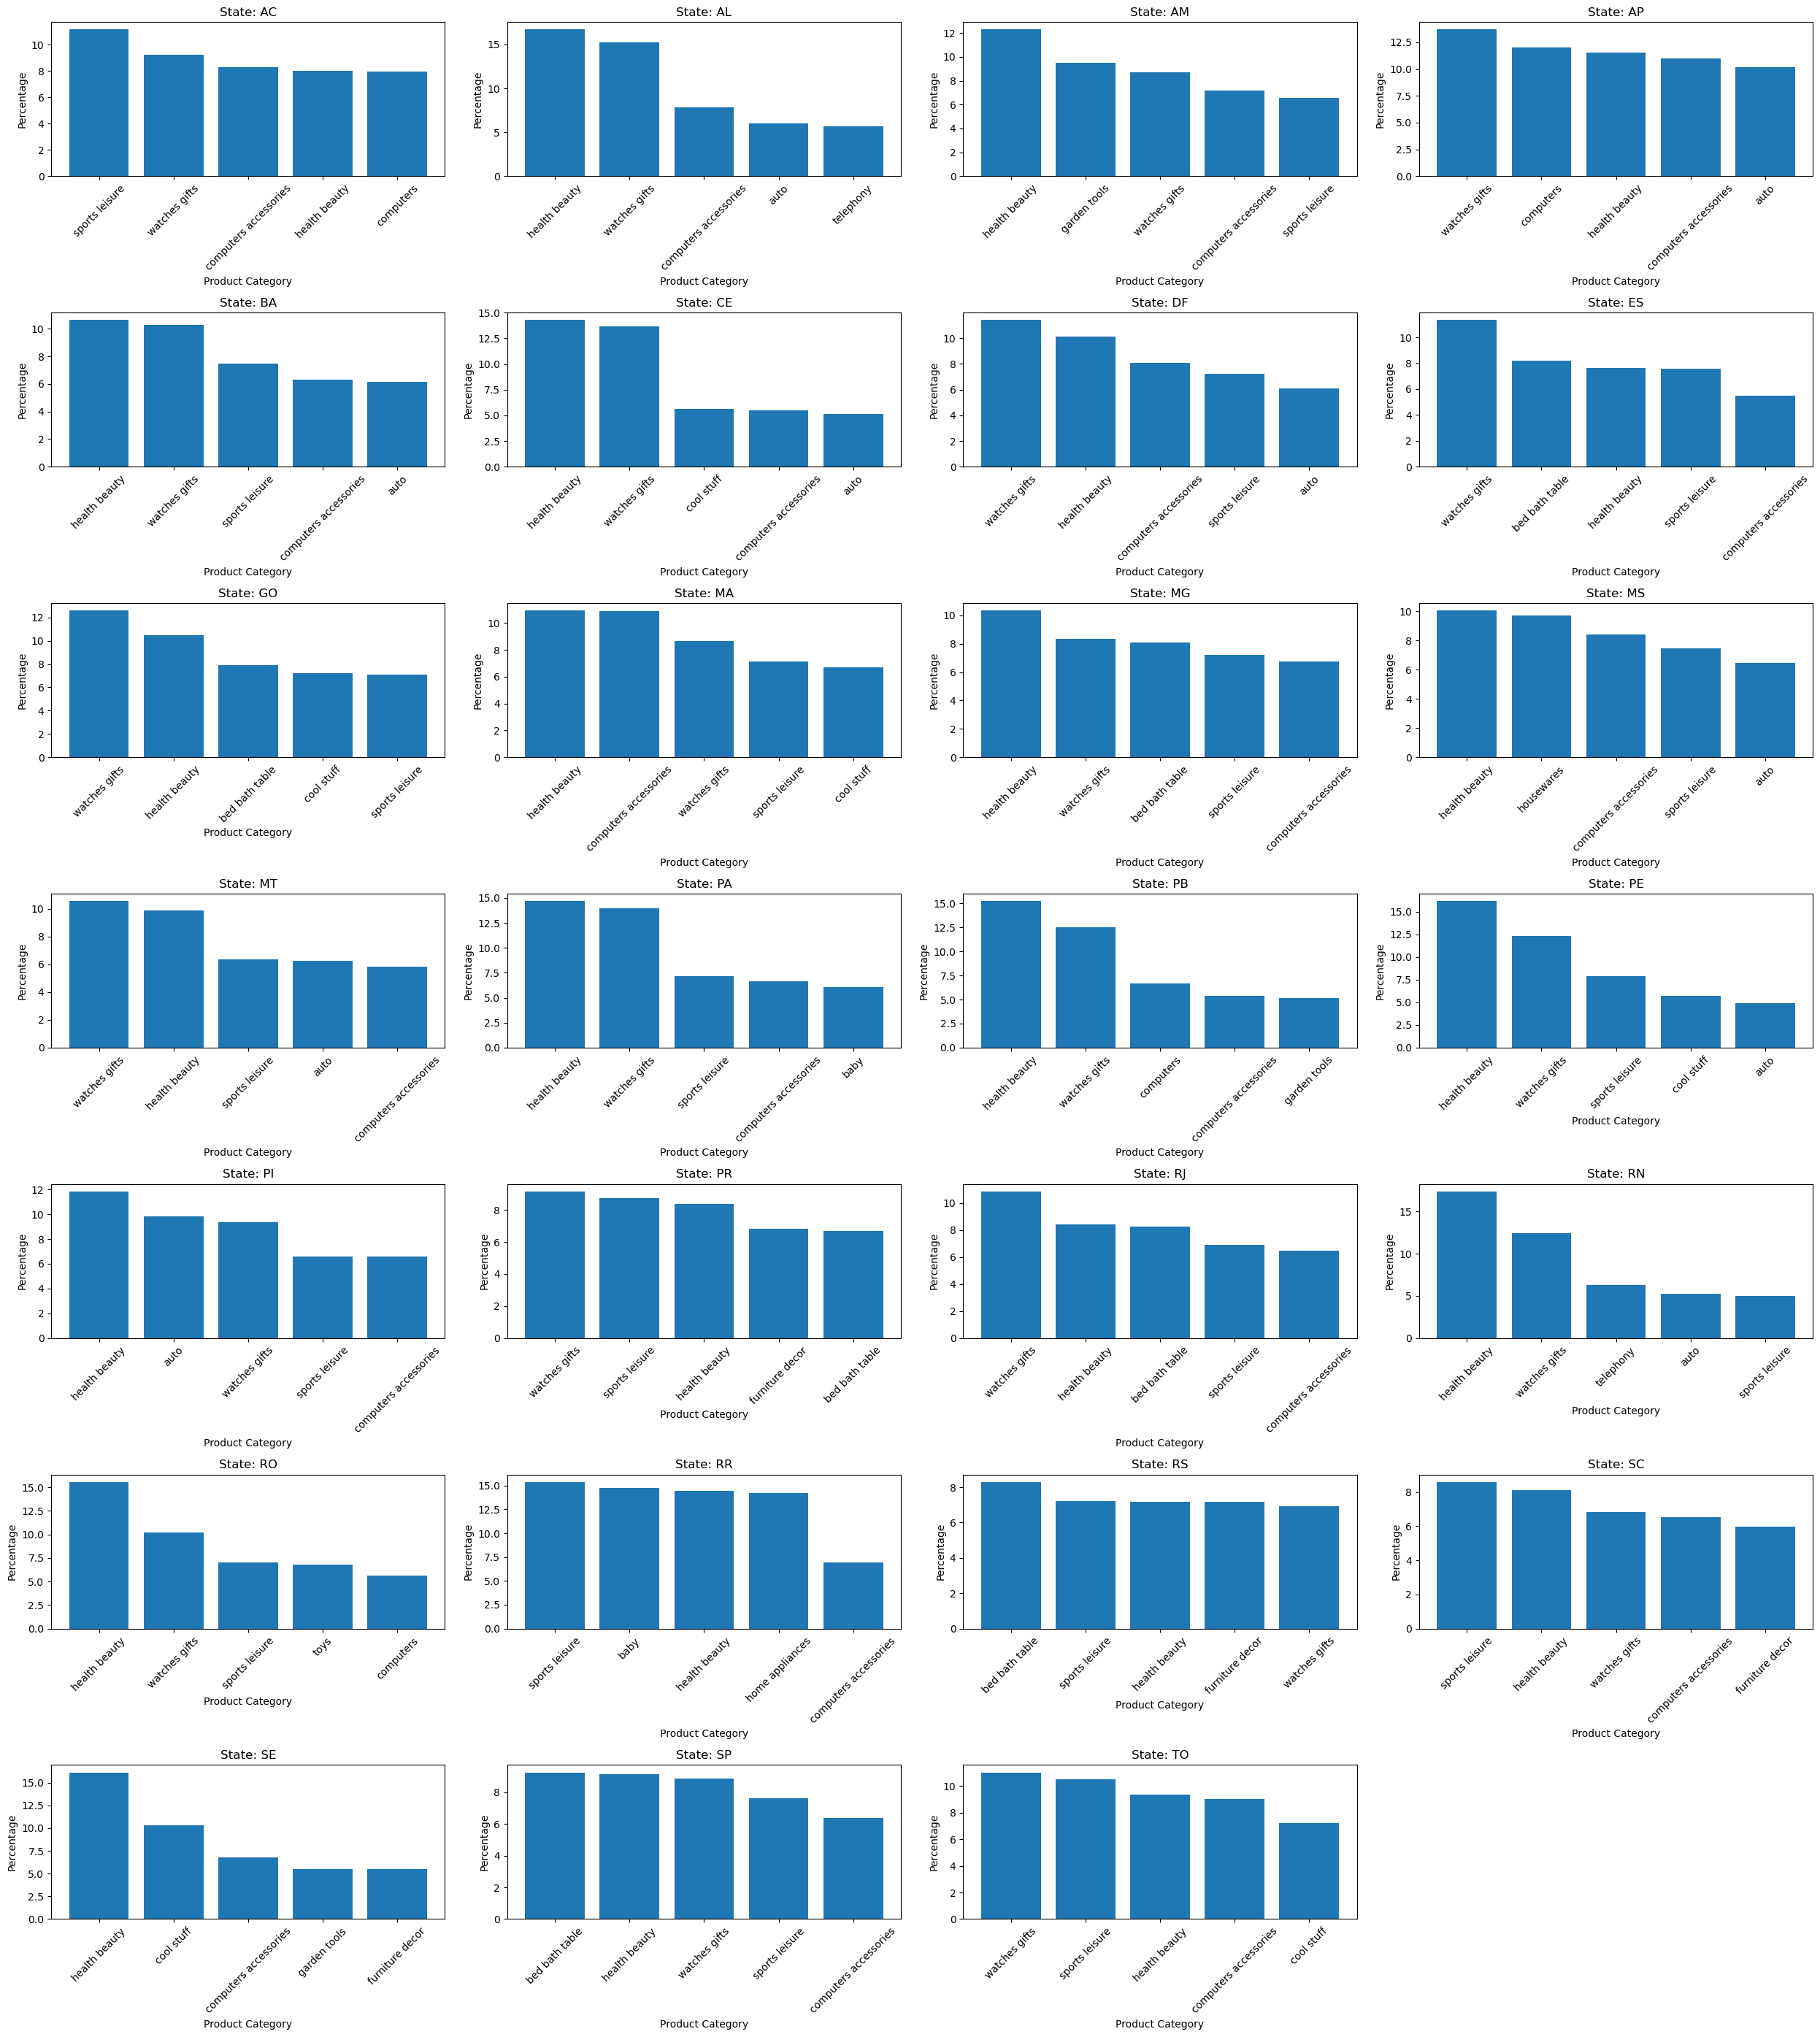

In [36]:
num_states = len(top5_by_state['customer_state'].unique())
num_cols = 4
num_rows = math.ceil(num_states / num_cols)

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 4 * num_rows))


for idx, state in enumerate(top5_by_state['customer_state'].unique()):
    row = idx // num_cols
    col = idx % num_cols
    state_data = top5_by_state[top5_by_state['customer_state'] == state]
    ax = axs[row, col]
    ax.bar(state_data['product_category_name_english'], state_data['percentage'])
    ax.set_xlabel('Product Category')
    ax.set_ylabel('Percentage')
    ax.set_title(f'State: {state}')
    ax.tick_params(axis='x', rotation=45)

for idx in range(num_states, num_rows * num_cols):
    row = idx // num_cols
    col = idx % num_cols
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()


- Sports Leisure (3) : AC, RR, SC
- Health beauty (14) : AL, AM, BA, CE, MA, MG, MS, PA, PB, PE, PI, RN, RO, SE
- Watches gifts (8) : AP, DF, ES, GO, MT, PR, RJ, TO
- Bed bath table (2) : RS, SP

## 상품별 가격대

In [37]:
deduplicated_df

order_id                        product_id   
0       00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61  \
1       00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2       000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3       00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4       00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   
...                                  ...                               ...   
102420  fffc94f6ce00a00581880bf54a75a037  4aa6014eceb682077f9dc4bffebc05b0   
102421  fffcd46ef2263f404302a634eb57f7eb  32e07fd915822b0765e448c4dd74c828   
102422  fffce4705a9662cd70adb13d4a31832d  72a30483855e2eafc67aee5dc2560482   
102423  fffe18544ffabc95dfada21779c9644f  9c422a519119dcad7575db5af1ba540e   
102424  fffe41c64501cc87c801fd61db3f6244  350688d9dc1e75ff97be326363655e01   

         price  freight_value                       customer_id   
0        58.90          13.29  3ce436f183e68e07877b285a838db11a  \
1       239.90          19.93  f6dd3ec061db4e3987629fe6b26e5cce   
2       199.00          17.87  6489ae5e4333f3693df5ad4372dab6d3   
3        12.99          12.79  d4eb9395c8c0431ee92fce09860c5a06   
4       199.90          18.14  58dbd0b2d70206bf40e62cd34e84d795   
...        ...            ...                               ...   
102420  299.99          43.41  b51593916b4b8e0d6f66f2ae24f2673d   
102421  350.00          36.53  84c5d4fbaf120aae381fad077416eaa0   
102422   99.90          16.95  29309aa813182aaddc9b259e31b870e6   
102423   55.99           8.72  b5e6afd5a41800fdf401e0272ca74655   
102424   43.00          12.79  96d649da0cc4ff33bb408b199d4c7dcf   

        customer_zip_code_prefix          customer_city customer_state   
0                          28013  campos dos goytacazes             RJ  \
1                          15775        santa fe do sul             SP   
2                          35661          para de minas             MG   
3                          12952                atibaia             SP   
4                          13226        varzea paulista             SP   
...                          ...                    ...            ...   
102420                     65077               sao luis             MA   
102421                     81690               curitiba             PR   
102422                      4039              sao paulo             SP   
102423                     13289                vinhedo             SP   
102424                     18605               botucatu             SP   

        geolocation_lat  geolocation_lng product_category_name_english  
0            -21.758076       -41.312633                    cool stuff  
1            -20.212393       -50.941471                      pet shop  
2            -19.860439       -44.597972               furniture decor  
3            -23.144923       -46.539830                     perfumery  
4            -23.249008       -46.824961                  garden tools  
...                 ...              ...                           ...  
102420        -2.490420       -44.303287                    housewares  
102421       -25.601485       -49.317700         computers accessories  
102422       -23.597813       -46.650272                sports leisure  
102423       -23.036935       -46.982526         computers accessories  
102424       -22.908684       -48.440255                bed bath table  

[102425 rows x 11 columns]

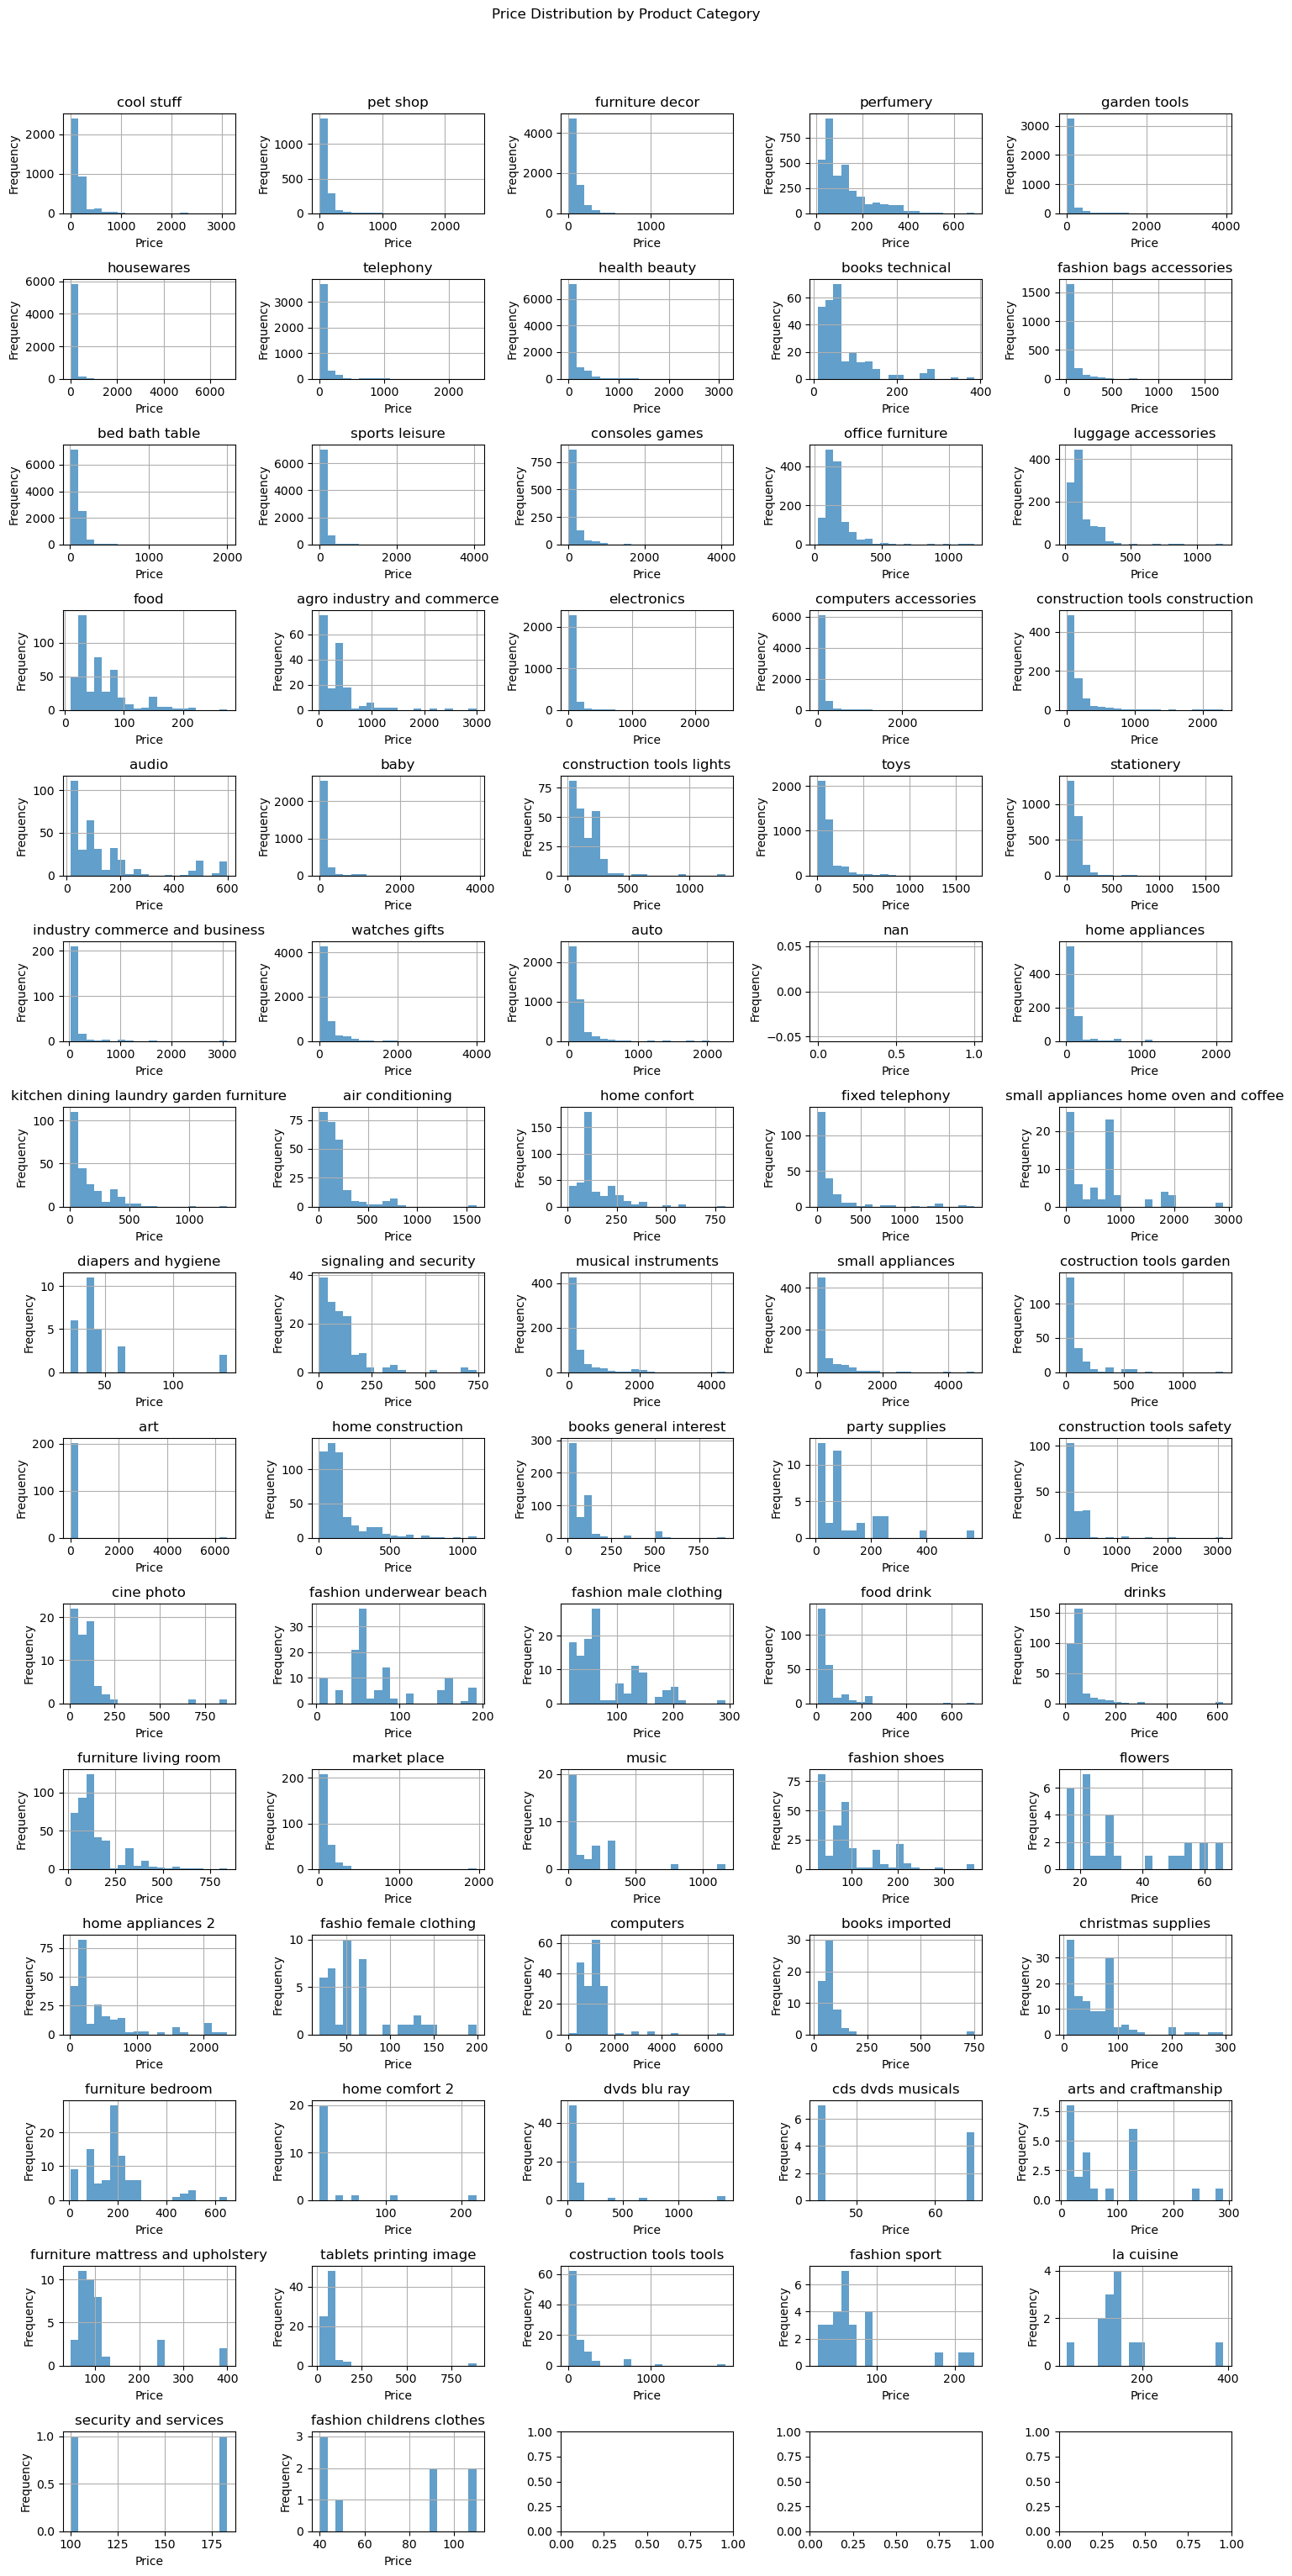

In [38]:
fig, axs = plt.subplots(nrows=15, ncols=5, figsize=(15, 30))
fig.suptitle('Price Distribution by Product Category', y=1.02)

unique_categories = deduplicated_df['product_category_name_english'].unique()

for idx, category in enumerate(unique_categories):
    ax = axs[idx // 5, idx % 5]
    category_data = deduplicated_df[deduplicated_df['product_category_name_english'] == category]['price']
    ax.hist(category_data, bins=20, alpha=0.7)
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{category}')
    ax.grid(True)

plt.tight_layout()
plt.show()

# 위치별 배송 기간 / 운송비

In [39]:
merged_df = pd.merge(order_item, orders, on='order_id', how='left')
merged_df = pd.merge(merged_df, order_payments, on='order_id', how='left')
merged_df = pd.merge(merged_df, customer, on='customer_id', how='left')
merged_df = pd.merge(merged_df, products, on='product_id', how='left')
merged_with_geo = pd.merge(merged_df, geo, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
merged_with_geo = pd.merge(merged_with_geo, name_trans, left_on='product_category_name', right_on='product_category_name', how='left')
merged_with_geo['product_category_name_english'] = merged_with_geo['product_category_name_english'].str.replace('_', ' ')

In [40]:
merged_with_geo = merged_with_geo[['order_id', 'product_id', 'seller_id',
       'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng',
       'product_category_name_english']]

In [41]:
selected_columns = ['order_id', 'product_id', 'price', 'freight_value', 'customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'product_category_name_english']
deduplicated_df = merged_with_geo.drop_duplicates(subset=selected_columns)

In [42]:
carrier_data = deduplicated_df[['order_id', 'product_id',
       'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng',
       'product_category_name_english']]

In [43]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_columns:
    carrier_data[col] = pd.to_datetime(carrier_data[col])

carrier_data['pur_app'] = carrier_data['order_approved_at'] - carrier_data['order_purchase_timestamp']
carrier_data['car_app'] = carrier_data['order_delivered_carrier_date'] - carrier_data['order_approved_at']
carrier_data['de_car'] = carrier_data['order_delivered_customer_date'] - carrier_data['order_delivered_carrier_date']
carrier_data['over'] = (carrier_data['order_delivered_customer_date'] > carrier_data['order_estimated_delivery_date']).astype(int)

carrier_data

/var/folders/jr/r32rns2x2dd3llvsz29fhf9m0000gn/T/ipykernel_16649/2713083061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carrier_data[col] = pd.to_datetime(carrier_data[col])
/var/folders/jr/r32rns2x2dd3llvsz29fhf9m0000gn/T/ipykernel_16649/2713083061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carrier_data[col] = pd.to_datetime(carrier_data[col])
/var/folders/jr/r32rns2x2dd3llvsz29fhf9m0000gn/T/ipykernel_16649/2713083061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

order_id                        product_id   
0         00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61  \
149       00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
516       000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
740       00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
767       00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   
...                                    ...                               ...   
17955149  fffc94f6ce00a00581880bf54a75a037  4aa6014eceb682077f9dc4bffebc05b0   
17955238  fffcd46ef2263f404302a634eb57f7eb  32e07fd915822b0765e448c4dd74c828   
17955284  fffce4705a9662cd70adb13d4a31832d  72a30483855e2eafc67aee5dc2560482   
17955341  fffe18544ffabc95dfada21779c9644f  9c422a519119dcad7575db5af1ba540e   
17955402  fffe41c64501cc87c801fd61db3f6244  350688d9dc1e75ff97be326363655e01   

           price  freight_value                       customer_id   
0          58.90          13.29  3ce436f183e68e07877b285a838db11a  \
149       239.90          19.93  f6dd3ec061db4e3987629fe6b26e5cce   
516       199.00          17.87  6489ae5e4333f3693df5ad4372dab6d3   
740        12.99          12.79  d4eb9395c8c0431ee92fce09860c5a06   
767       199.90          18.14  58dbd0b2d70206bf40e62cd34e84d795   
...          ...            ...                               ...   
17955149  299.99          43.41  b51593916b4b8e0d6f66f2ae24f2673d   
17955238  350.00          36.53  84c5d4fbaf120aae381fad077416eaa0   
17955284   99.90          16.95  29309aa813182aaddc9b259e31b870e6   
17955341   55.99           8.72  b5e6afd5a41800fdf401e0272ca74655   
17955402   43.00          12.79  96d649da0cc4ff33bb408b199d4c7dcf   

         order_status order_purchase_timestamp   order_approved_at   
0           delivered      2017-09-13 08:59:02 2017-09-13 09:45:35  \
149         delivered      2017-04-26 10:53:06 2017-04-26 11:05:13   
516         delivered      2018-01-14 14:33:31 2018-01-14 14:48:30   
740         delivered      2018-08-08 10:00:35 2018-08-08 10:10:18   
767         delivered      2017-02-04 13:57:51 2017-02-04 14:10:13   
...               ...                      ...                 ...   
17955149    delivered      2018-04-23 13:57:06 2018-04-25 04:11:01   
17955238    delivered      2018-07-14 10:26:46 2018-07-17 04:31:48   
17955284    delivered      2017-10-23 17:07:56 2017-10-24 17:14:25   
17955341    delivered      2017-08-14 23:02:59 2017-08-15 00:04:32   
17955402    delivered      2018-06-09 17:00:18 2018-06-09 17:10:13   

         order_delivered_carrier_date order_delivered_customer_date  ...   
0                 2017-09-19 18:34:16           2017-09-20 23:43:48  ...  \
149               2017-05-04 14:35:00           2017-05-12 16:04:24  ...   
516               2018-01-16 12:36:48           2018-01-22 13:19:16  ...   
740               2018-08-10 13:28:00           2018-08-14 13:32:39  ...   
767               2017-02-16 09:46:09           2017-03-01 16:42:31  ...   
...                               ...                           ...  ...   
17955149          2018-04-25 12:09:00           2018-05-10 22:56:40  ...   
17955238          2018-07-17 08:05:00           2018-07-23 20:31:55  ...   
17955284          2017-10-26 15:13:14           2017-10-28 12:22:22  ...   
17955341          2017-08-15 19:02:53           2017-08-16 21:59:40  ...   
17955402          2018-06-11 14:11:00           2018-06-14 17:56:26  ...   

         customer_zip_code_prefix          customer_city customer_state   
0                           28013  campos dos goytacazes             RJ  \
149                         15775        santa fe do sul             SP   
516                         35661          para de minas             MG   
740                         12952                atibaia             SP   
767                         13226        varzea paulista             SP   
...                           ...       

## 위치별 배송 정보 (구매 후 승인, 승인후 배송시작, 배송시작 후 배송도착)

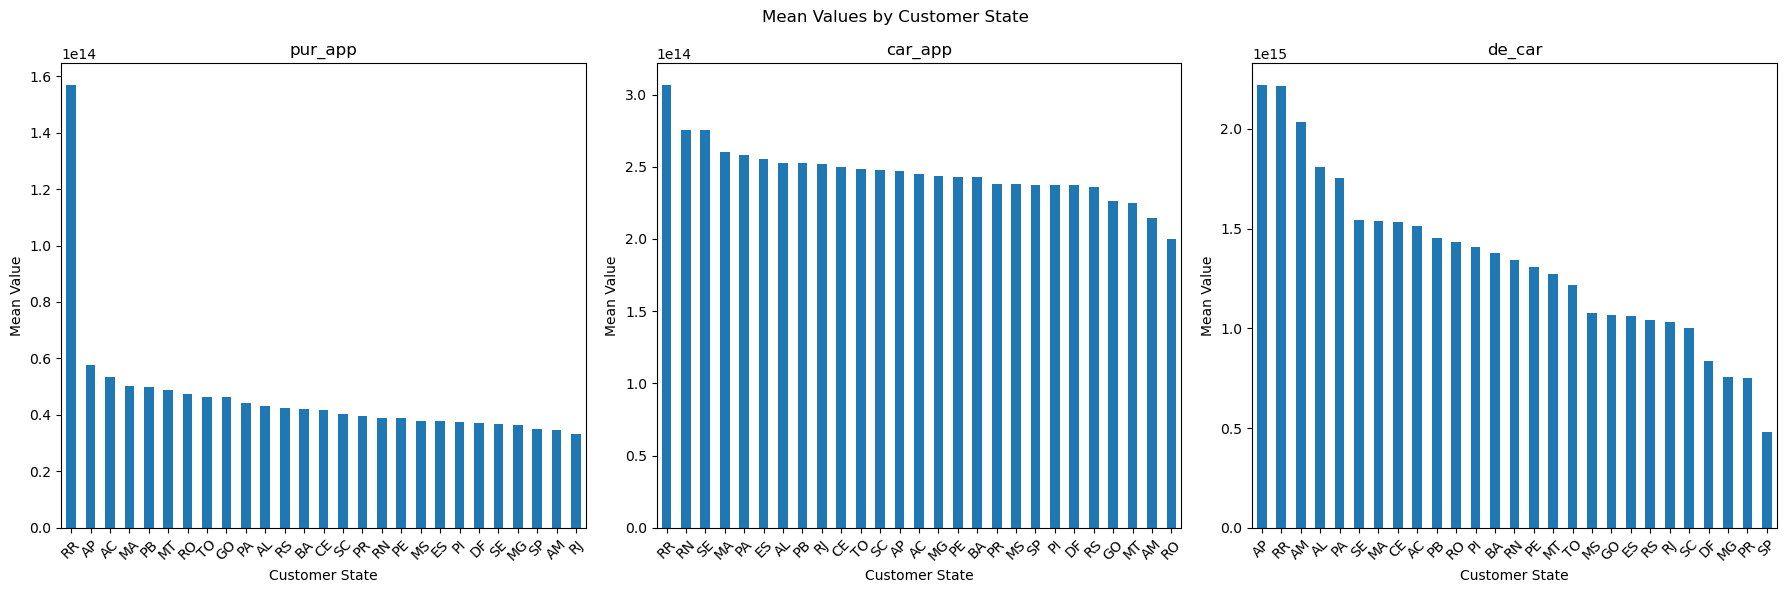

In [44]:
state_mean_values = carrier_data.groupby('customer_state')[['pur_app', 'car_app', 'de_car']].mean()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Mean Values by Customer State')

for idx, column in enumerate(state_mean_values.columns):
    ax = axs[idx]
    sorted_data = state_mean_values.sort_values(by=column, ascending=False)
    sorted_data[column].plot(kind='bar', ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Customer State')
    ax.set_ylabel('Mean Value')
    ax.set_xticklabels(sorted_data.index, rotation=45)

plt.tight_layout()
plt.show()

## 배송 기한 보다 배송이 늦은 위치

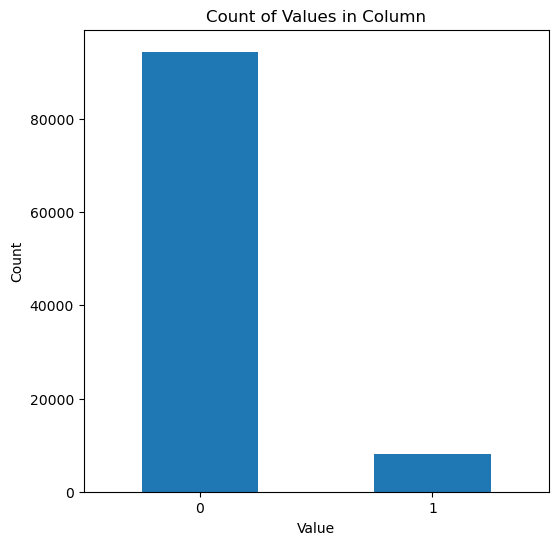

Number of value 1 : 7996


In [53]:
over_counts = carrier_data['over'].value_counts()

over_counts.plot(kind='bar', figsize=(6, 6))
plt.title('Count of Values in Column')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

count_over_1 = (carrier_data['over'] == 1).sum()

print(f"Number of value 1 : {count_over_1}")

## 배송 기한보다 늦게 배송된 위치 빈도수

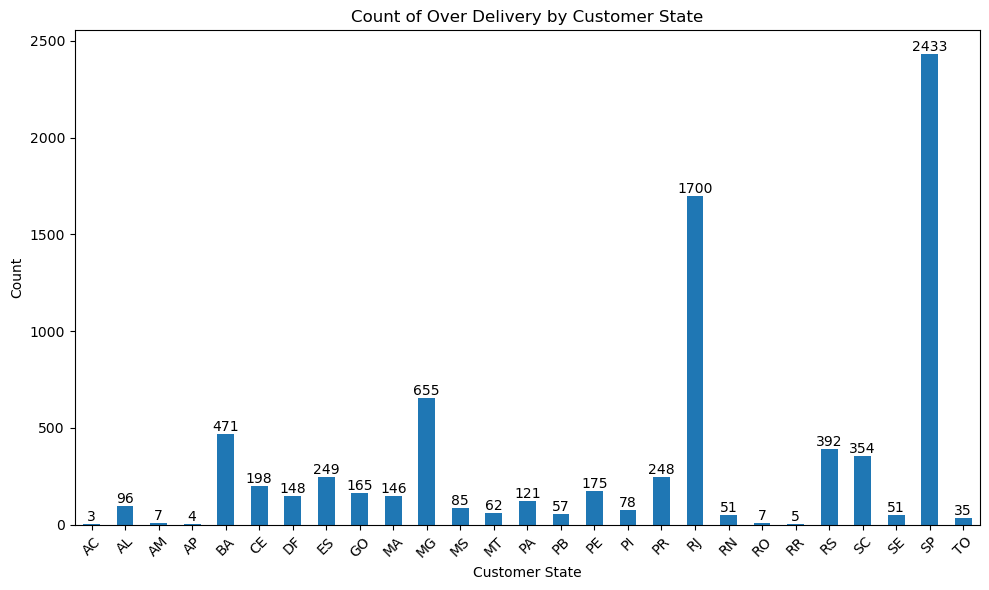

In [46]:
state_over_counts = carrier_data.groupby('customer_state')['over'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
bars = state_over_counts.plot(kind='bar', ax=ax)
plt.title('Count of Over Delivery by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Count')

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 위치별 카드 결제 타입 / 할부 여부

In [47]:
payment_data = merged_with_geo[['order_id', 'product_id','price', 'customer_id',
       'order_status','payment_sequential', 'payment_type',
       'payment_installments', 'payment_value',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng',
       'product_category_name_english']]

In [48]:
max_price = deduplicated_df['price'].max()
print(f"Maximum Price: {max_price}")

Maximum Price: 6735.0


## 위치별 결제타입

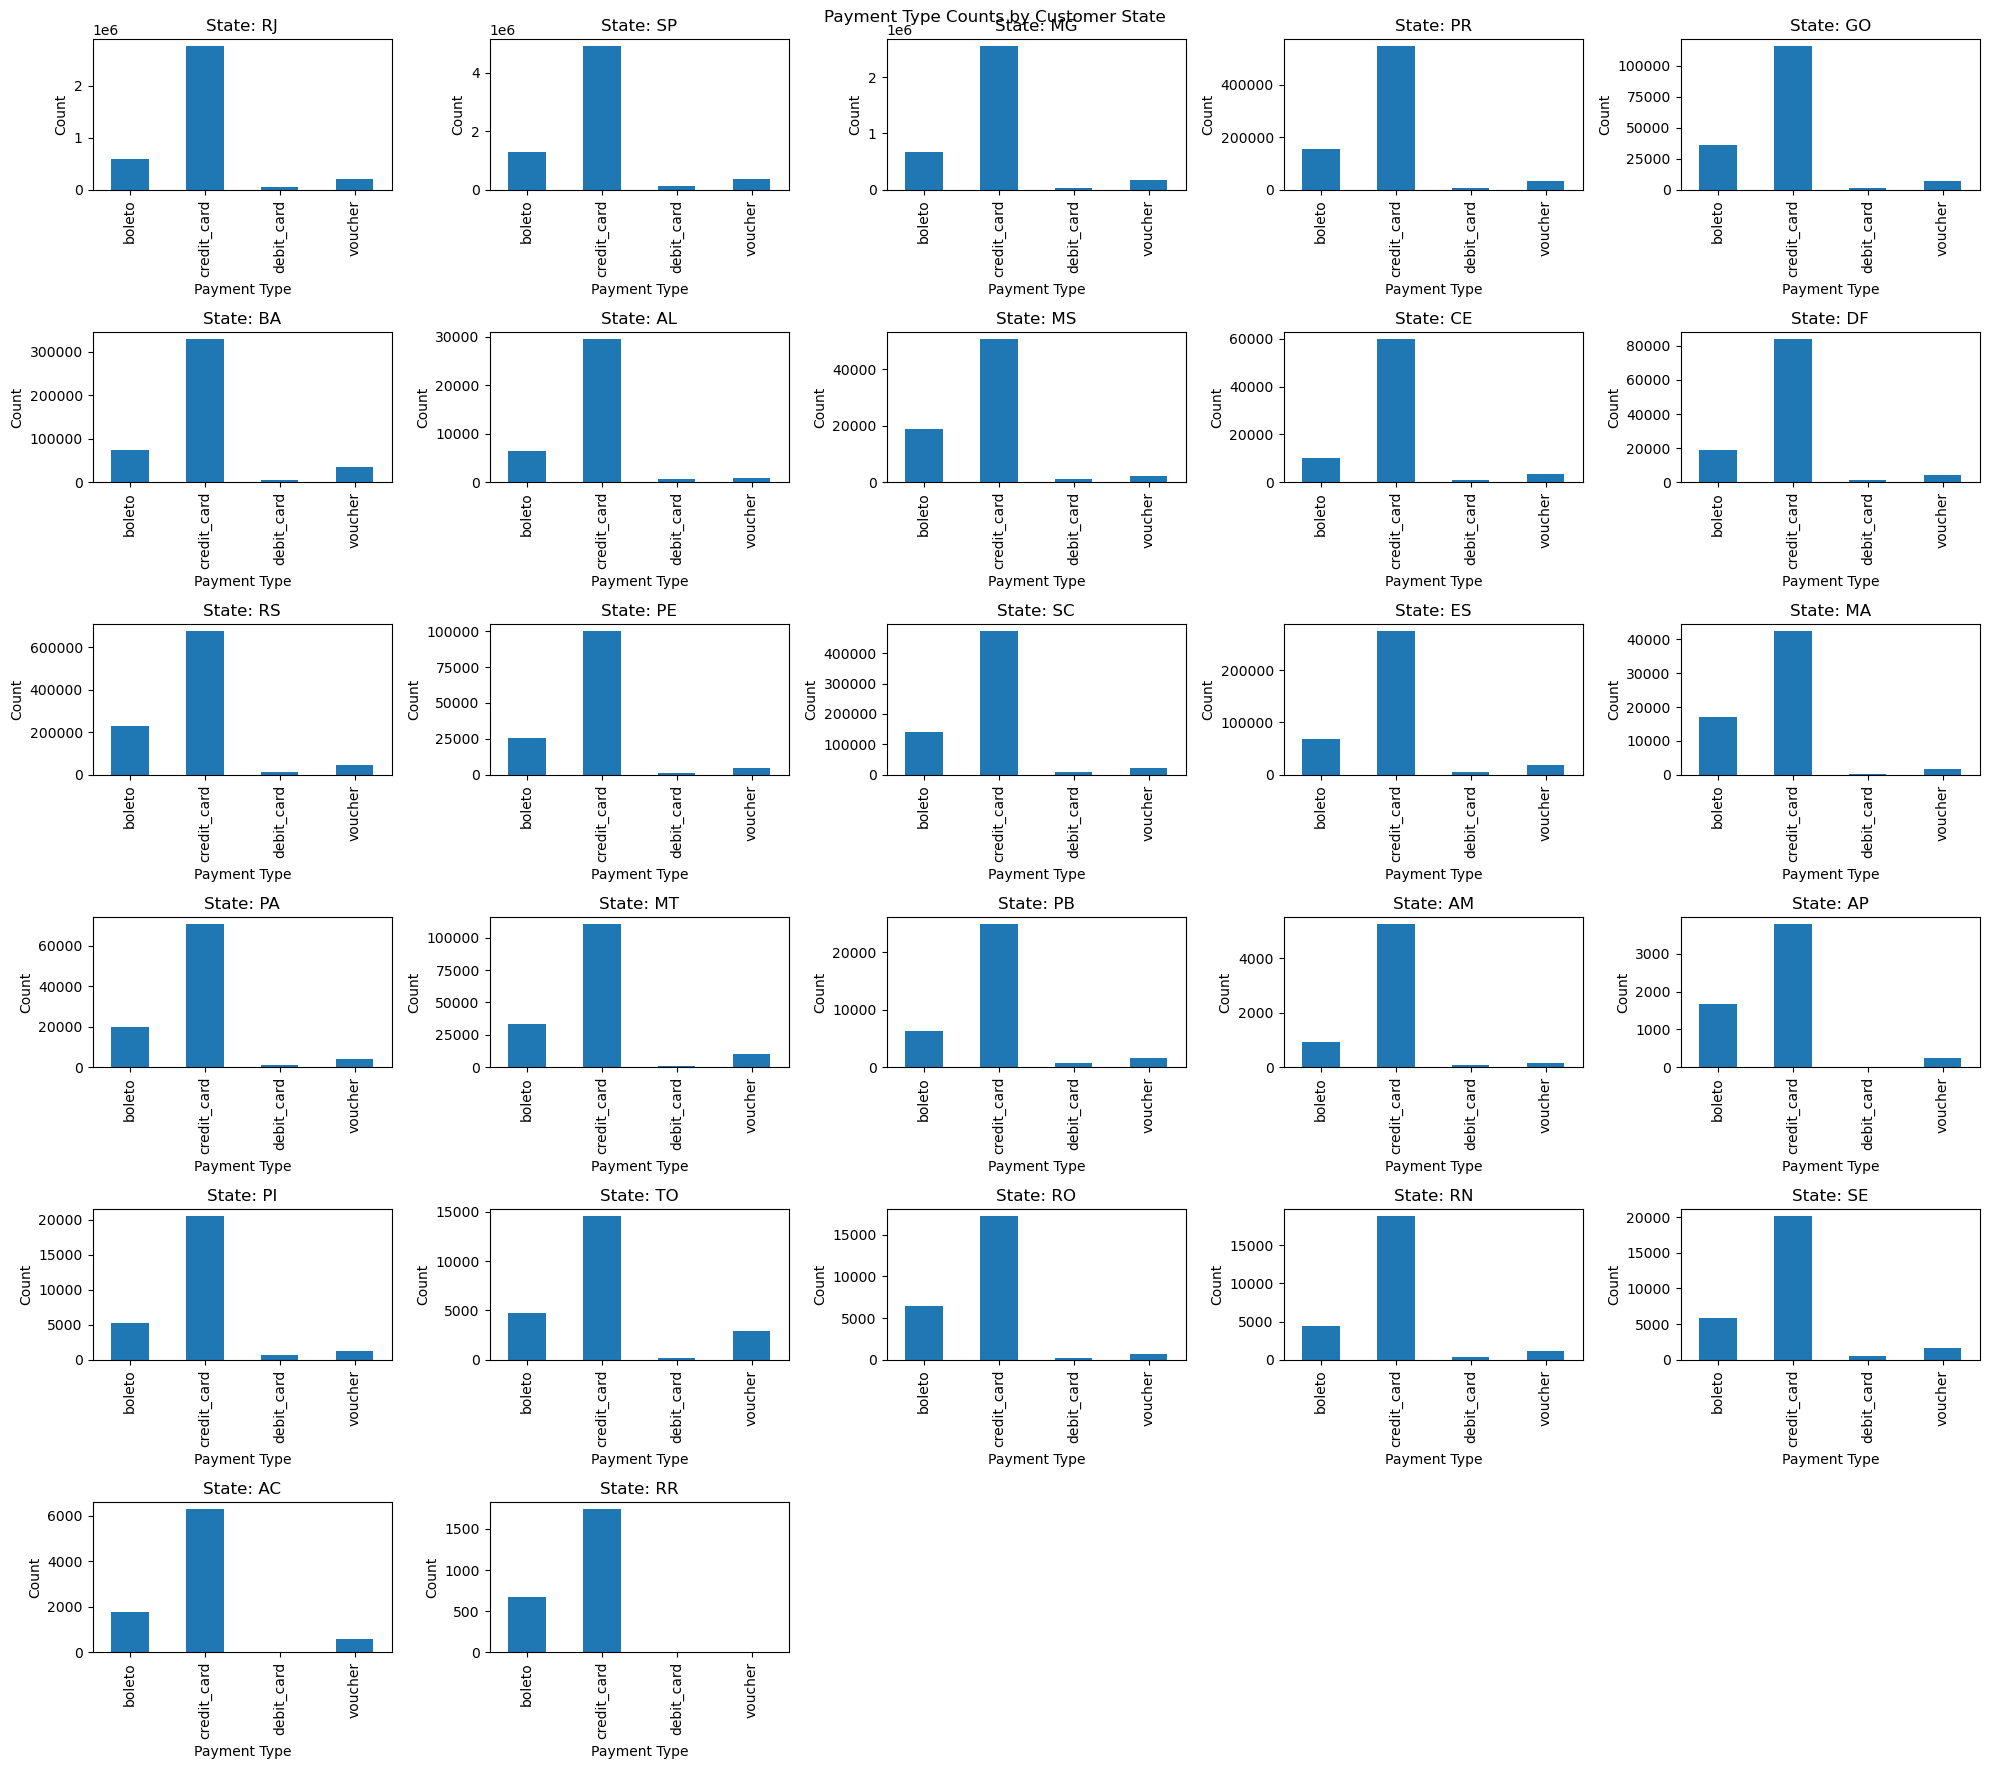

In [49]:
state_payment_counts = payment_data.groupby(['customer_state', 'payment_type']).size().unstack()

unique_states = payment_data['customer_state'].unique()
num_states = len(unique_states)

num_rows = (num_states + 4) // 5 

fig, axs = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 3*num_rows))
fig.suptitle('Payment Type Counts by Customer State')

for idx, state in enumerate(unique_states):
    row_idx = idx // 5
    col_idx = idx % 5
    state_data = state_payment_counts.loc[state]
    ax = axs[row_idx, col_idx]
    state_data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Payment Type')
    ax.set_ylabel('Count')
    ax.set_title(f'State: {state}')

for idx in range(num_states, num_rows*5):
    row_idx = idx // 5
    col_idx = idx % 5
    fig.delaxes(axs[row_idx, col_idx])

plt.tight_layout()
plt.show()


## 위치별 카드 사용자의 할부 개월수

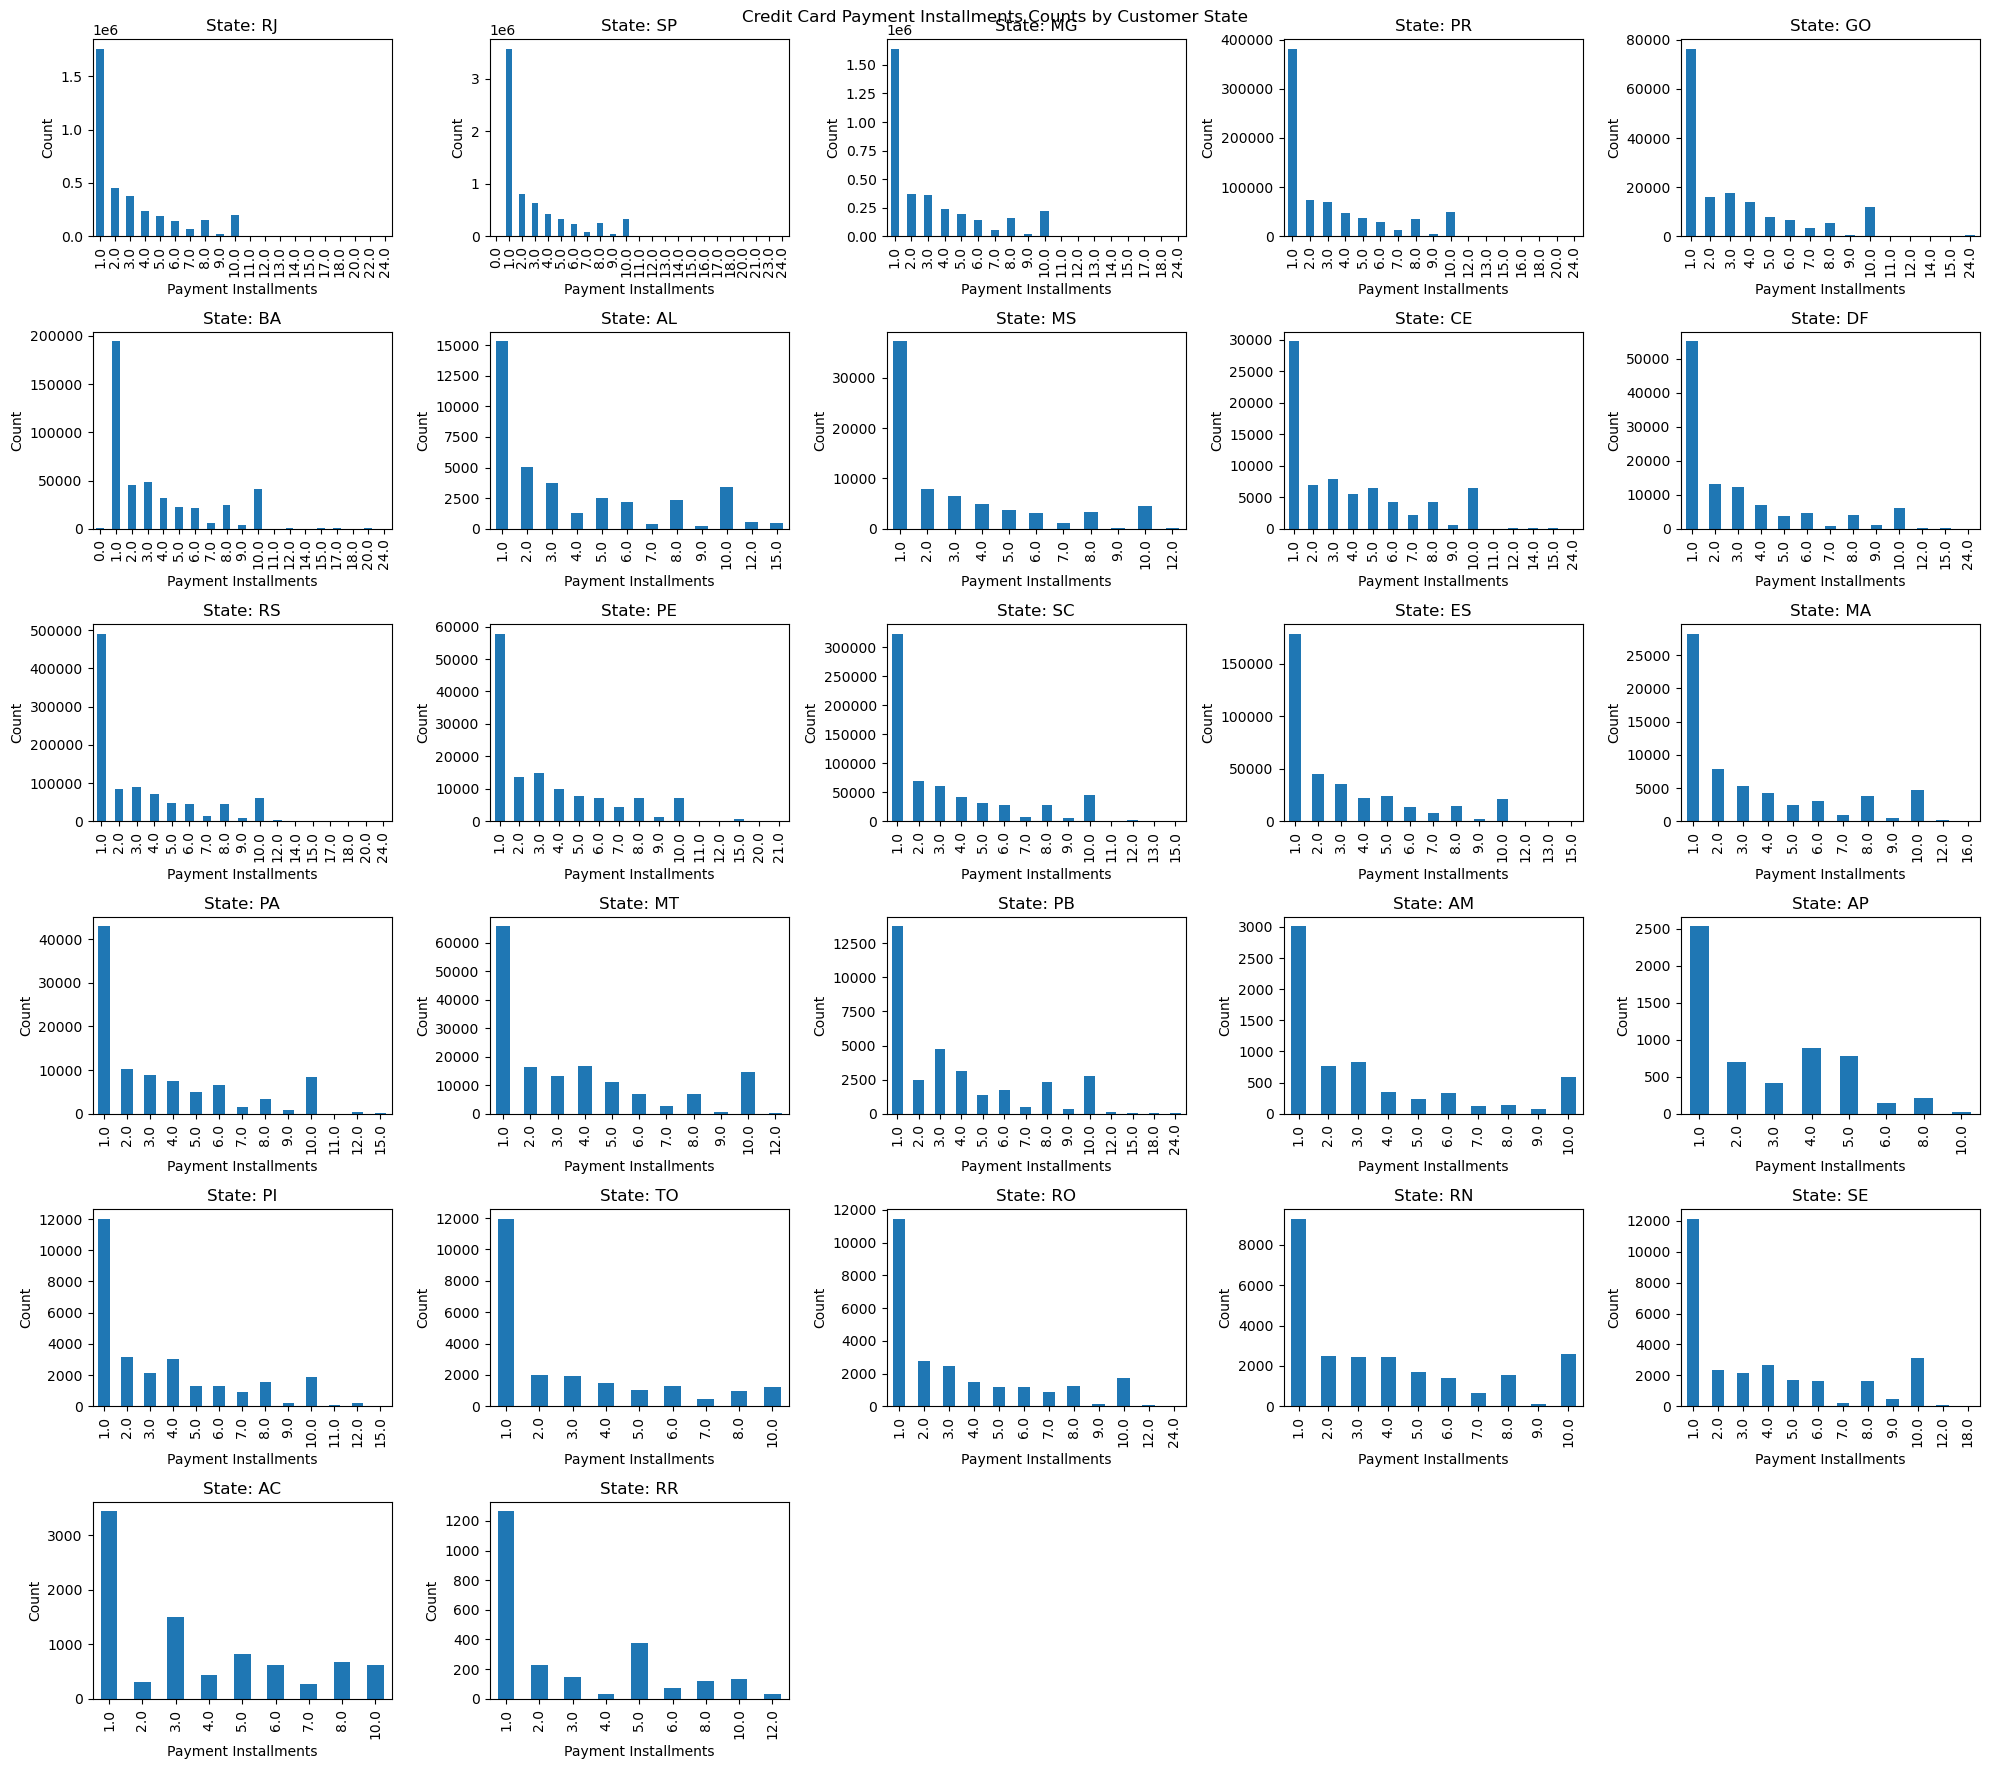

In [50]:
unique_states = payment_data['customer_state'].unique()
num_states = len(unique_states)

num_rows = (num_states + 4) // 5 

fig, axs = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 3*num_rows))
fig.suptitle('Credit Card Payment Installments Counts by Customer State')

for idx, state in enumerate(unique_states):
    row_idx = idx // 5
    col_idx = idx % 5
    state_data = payment_data[payment_data['customer_state'] == state]['payment_installments']
    ax = axs[row_idx, col_idx]
    state_data.value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_xlabel('Payment Installments')
    ax.set_ylabel('Count')
    ax.set_title(f'State: {state}')

for idx in range(num_states, num_rows*5):
    row_idx = idx // 5
    col_idx = idx % 5
    fig.delaxes(axs[row_idx, col_idx])

plt.tight_layout()
plt.show()


## 상품별 할부 개월수

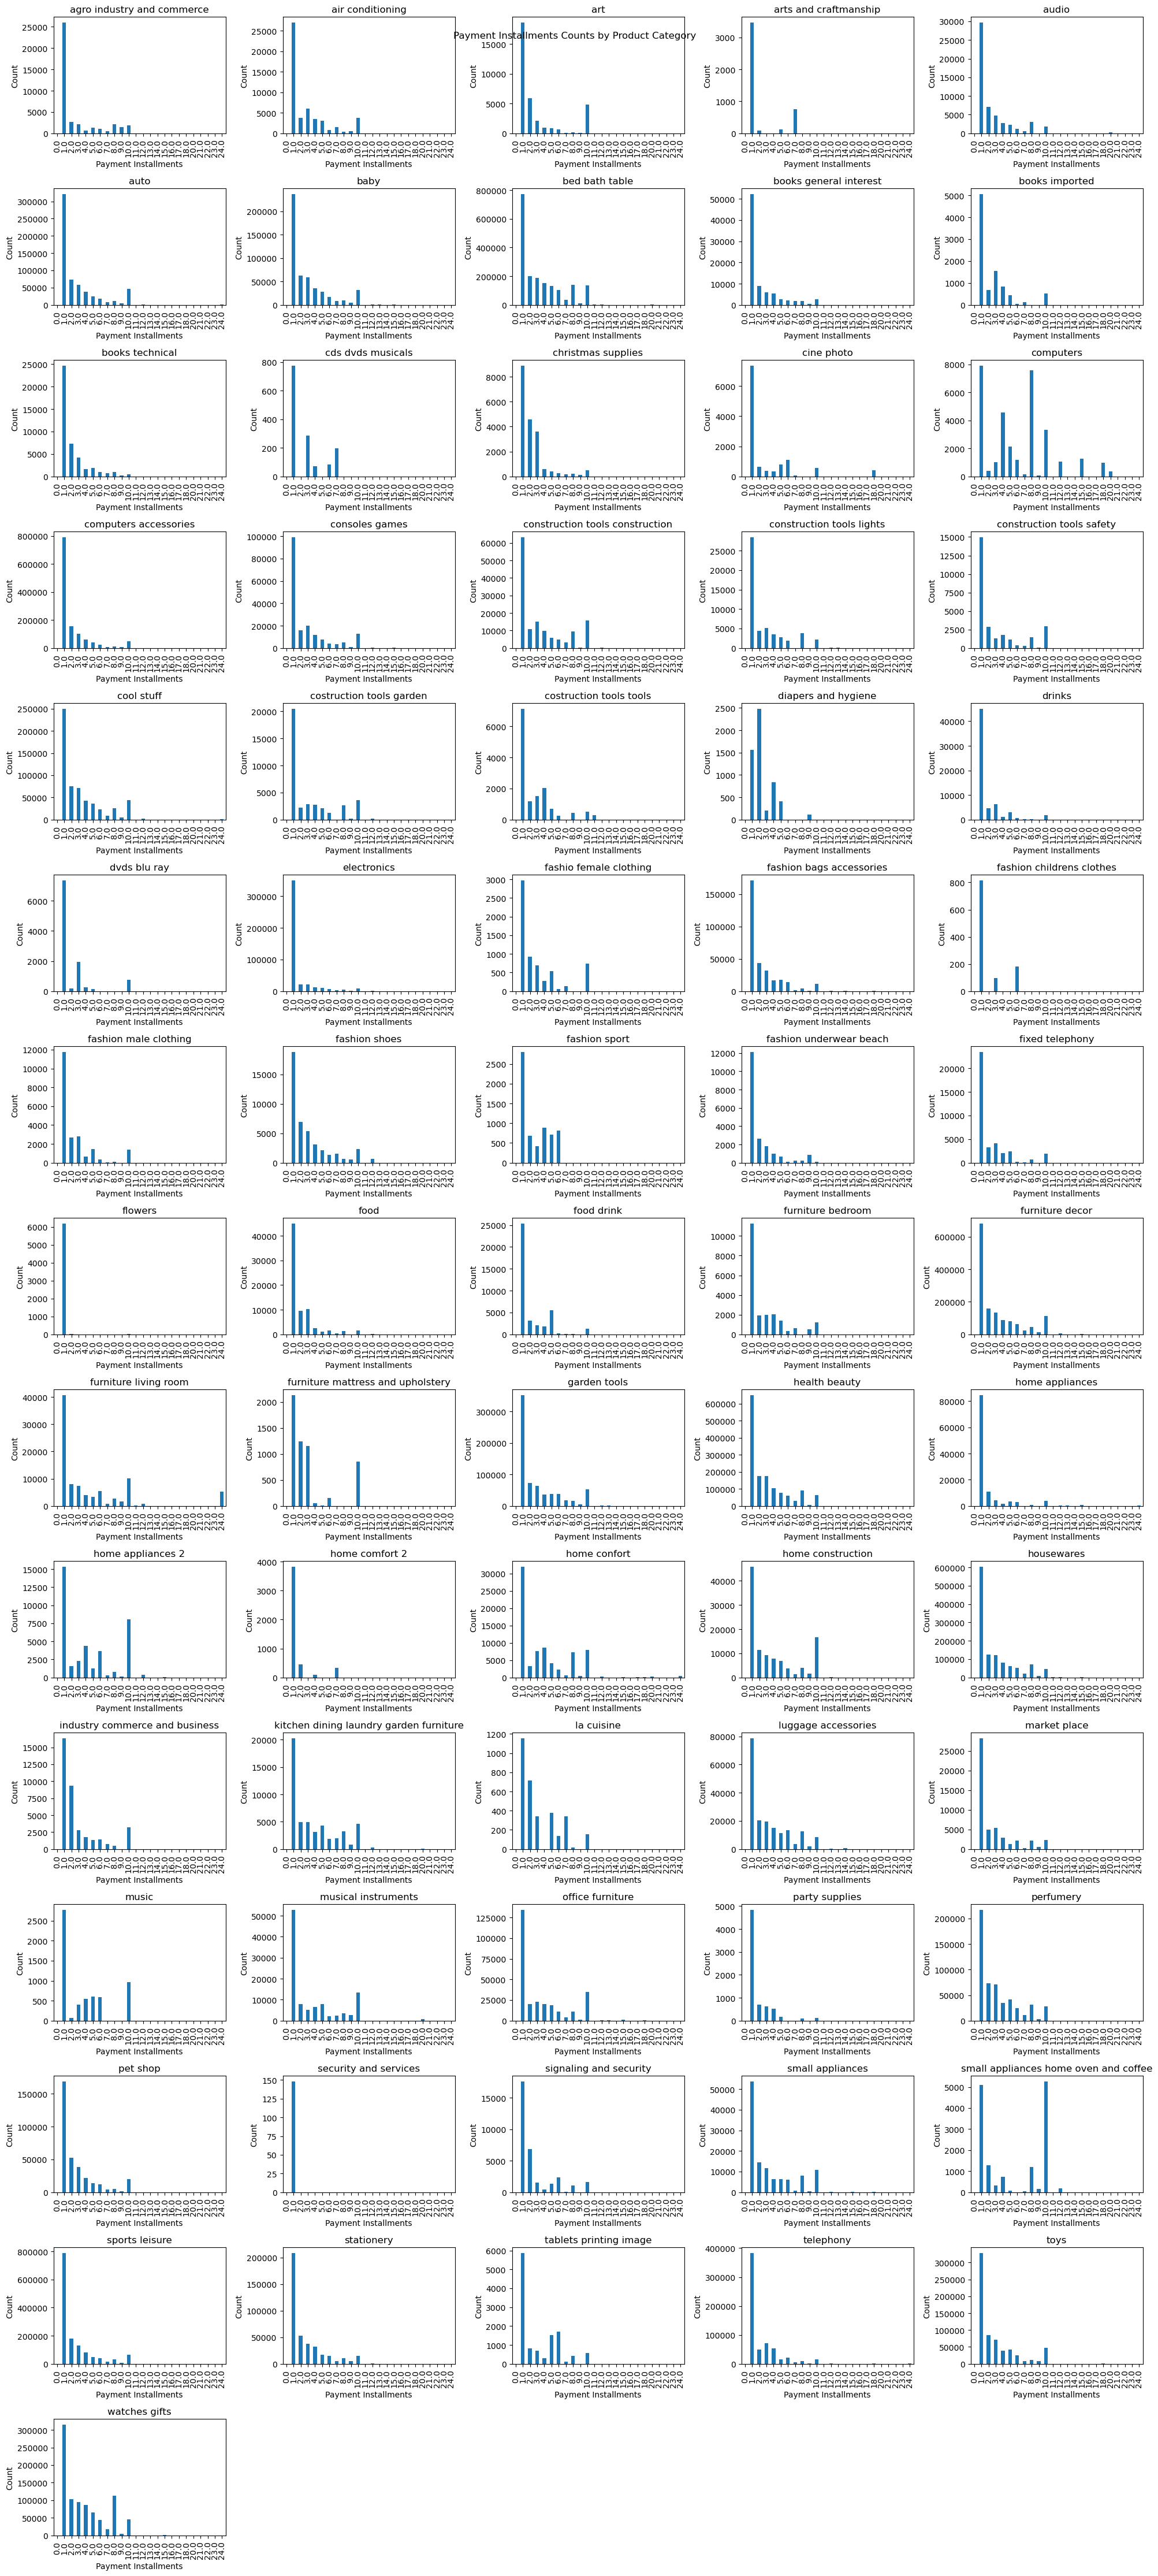

In [51]:
category_installments_counts = payment_data.groupby(['product_category_name_english', 'payment_installments']).size().unstack()

num_rows = math.ceil(category_installments_counts.shape[0] / 5)

fig, axs = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 3*num_rows))
fig.suptitle('Payment Installments Counts by Product Category')

for idx, (category, data) in enumerate(category_installments_counts.iterrows()):
    row_idx = idx // 5
    col_idx = idx % 5
    ax = axs[row_idx, col_idx]
    data.plot(kind='bar', ax=ax)
    ax.set_xlabel('Payment Installments')
    ax.set_ylabel('Count')
    ax.set_title(f'{category}')

for idx in range(category_installments_counts.shape[0], num_rows*5):
    row_idx = idx // 5
    col_idx = idx % 5
    fig.delaxes(axs[row_idx, col_idx])

plt.tight_layout()
plt.show()

## 가격별 할부 개월 수

/var/folders/jr/r32rns2x2dd3llvsz29fhf9m0000gn/T/ipykernel_16649/699822297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_data['price_bin'] = pd.cut(payment_data['price'], bins)


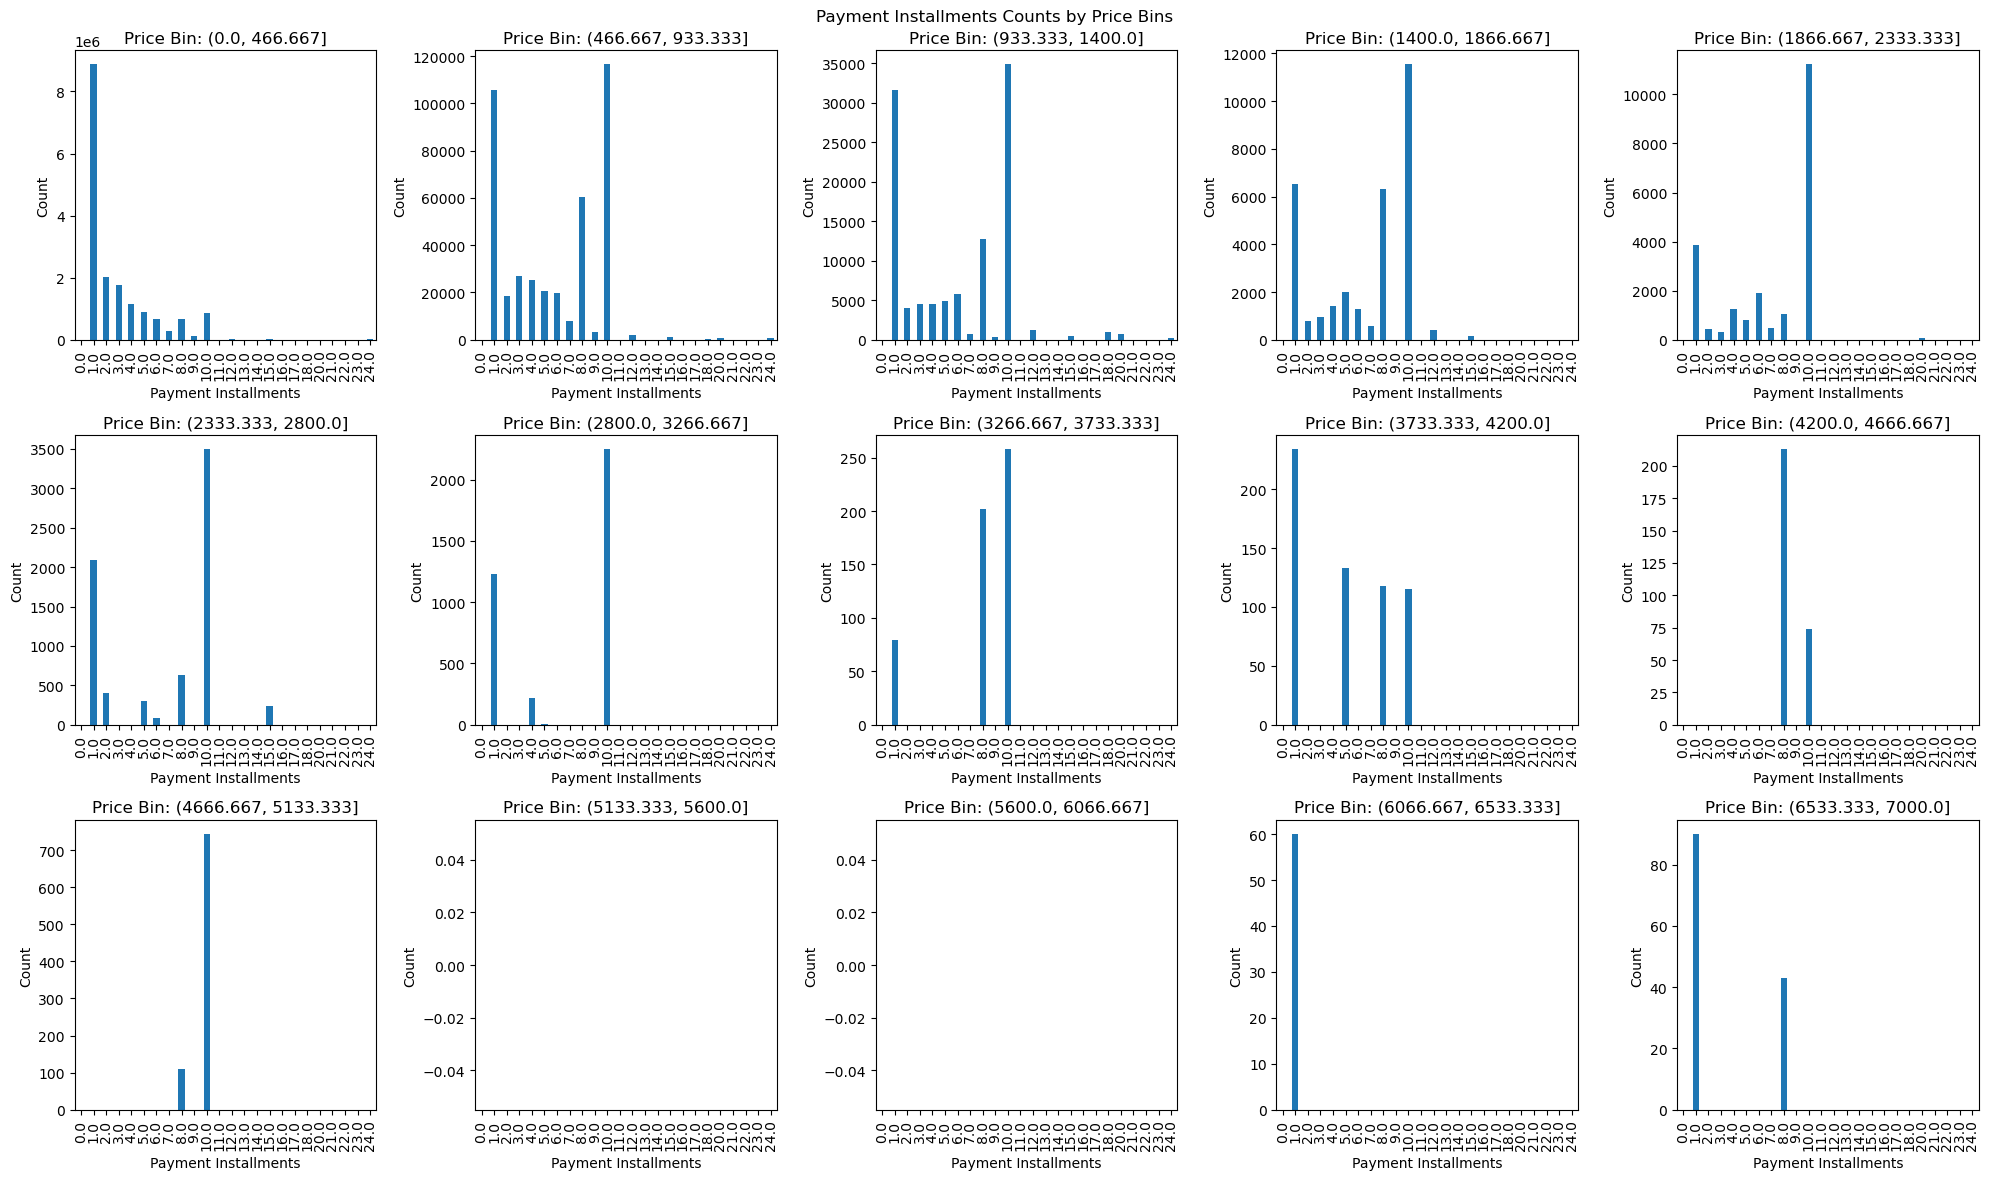

In [52]:
bins = np.linspace(0, 7000, 16)

payment_data['price_bin'] = pd.cut(payment_data['price'], bins)
installments_counts = payment_data.groupby('price_bin')['payment_installments'].value_counts().unstack(fill_value=0)

num_rows = (len(installments_counts) + 4) // 5

fig, axs = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 4*num_rows))
fig.suptitle('Payment Installments Counts by Price Bins')

for idx, (bin_range, counts) in enumerate(installments_counts.iterrows()):
    row_idx = idx // 5
    col_idx = idx % 5
    ax = axs[row_idx, col_idx]
    counts.plot(kind='bar', ax=ax)
    ax.set_xlabel('Payment Installments')
    ax.set_ylabel('Count')
    ax.set_title(f'Price Bin: {bin_range}')

for idx in range(len(installments_counts), num_rows*5):
    row_idx = idx // 5
    col_idx = idx % 5
    fig.delaxes(axs[row_idx, col_idx])

plt.tight_layout()
plt.show()